In [1]:
import pandas as pd
import boto3
import io
import numpy as np
import matplotlib.pyplot as plt


# the below extension properly formats a cell after it is run
%load_ext nb_black

# Set the maximum number of rows to 200
pd.set_option("display.max_rows", 200)


# Set the maximum number of columns to 200
pd.set_option("display.max_columns", 200)

<IPython.core.display.Javascript object>

In [2]:
s3R = boto3.resource("s3")
s3 = boto3.client("s3")
bucket_name = "capstonehaystacks"
# Listing the contents of the S3 bucket
for obj in s3R.Bucket(bucket_name).objects.all():
    print(obj.key)

ACSDP5Y2021.DP04-Data.csv
GA_LISTINGS_SALES.csv
GA_LISTINGS_SALES_V2.csv
GA_listing.csv
all_zips_grocery_store.json
all_zips_restaurant.json
atlanta-geo.csv
atlanta_cbsa_zip.csv
atlanta_hdma_2021.csv
atlanta_hdma_census_2021.csv
atlanta_hdma_tract_2021.csv
atlanta_listings.csv
census_data
core_geo_dataset.csv
crime.csv
crime_rating_zipcode.csv
elementary_schools.csv
ga_georgia_zip_codes_geo.min.json
high_schools.csv
hmda_2017_ga_all-records_labels.csv
hmda_2021_ga_all-records_labels.csv
jason_listing.csv
listing-with-poi-distances.csv
listings_with_tract.csv
middle_schools.csv
poi_combined_haystack.csv
poi_combined_haystack_ALL.csv
poi_combined_haystack_ALL_CLEANED.csv
poi_expanded.csv
points-of-interest-google.csv
points-of-interest-google2.csv
points-of-interest-google3.csv
points-of-interest-haystacks.csv
schools.csv
zip_summary.csv
zipcode_expanded
zipcodes_111meter.min.json


<IPython.core.display.Javascript object>

In [3]:
file_name = "points-of-interest-google2.csv"

# Downloading the file from S3 and parsing it into a dataframe
s3.download_file(bucket_name, file_name, file_name)
# Low memory is set to False because columns have mixed data types
poi = pd.read_csv(file_name, index_col=False, low_memory=False)

<IPython.core.display.Javascript object>

In [4]:
file_name = "atlanta_cbsa_zip.csv"

# Downloading the file from S3 and parsing it into a dataframe
s3.download_file(bucket_name, file_name, file_name)
# Low memory is set to False because columns have mixed data types
atlanta_zip = pd.read_csv(file_name, index_col=False, low_memory=False)

<IPython.core.display.Javascript object>

In [5]:
file_name = "atlanta_hdma_2021.csv"

file_obj = s3.get_object(Bucket=bucket_name, Key=file_name)
hdma = pd.read_csv(file_obj["Body"])

<IPython.core.display.Javascript object>

In [6]:
zipcode_list = atlanta_zip["census_zcta5_geoid"].tolist()

<IPython.core.display.Javascript object>

In [7]:
poi["primary_category"].value_counts()

Restaurant                      2374
Gas station                     1965
Auto repair shop                1635
Hair salon                      1529
Nail salon                      1318
                                ... 
Patent attorney                    1
Wine wholesaler and importer       1
Bowling club                       1
Dry wall supply store              1
National reserve                   1
Name: primary_category, Length: 2531, dtype: int64

<IPython.core.display.Javascript object>

In [8]:
# removing all poi's that are closed
poi = poi[poi["state"] != "Permanently closed"]


<IPython.core.display.Javascript object>

In [9]:
# checking how many observations have a price
poi["price"].notnull().sum()

16576

<IPython.core.display.Javascript object>

In [10]:
poi[(poi["zip_code"] == 30024) & (poi["primary_category"] == "Korean restaurant")]


name  \
13551                      Pearl's Gardens   
16234             Mandoo Restaurant(만두아저씨)   
20454                 bb.q Chicken Suwanee   
37103                       Gopchang Salon   
42420                    GOP CHANG ON FIRE   
50488                          족과의동침 2 스와니   
53846                  진주가든(Pearls Garden)   
60754                     SOJU BOX (소주 박스)   
67162              Manna Korean Restaurant   
79331                         Poetree Cafe   
90572                           Sodeulnyuk   
92205                  Kang Seo Restaurant   
92206     So Gong Dong Tofu BBQ Restaurant   
92470  ANJOO Modern Korean BarBQ and Tapas   
93485     Bogle Bogle Tofu & Noodle (보글보글)   

                                                 address  \
13551  Pearl's Gardens, 45 Satellite Blvd, Suwanee, G...   
16234  Mandoo Restaurant(만두아저씨), 2700 Lawrenceville-S...   
20454  bb.q Chicken Suwanee, 2850 Lawrenceville-Suwan...   
37103  Gopchang Salon, 2850 Lawrenceville-Suwanee Rd ...   
42420  GOP CHANG ON FIRE, 1291 Old Peachtree Rd NW #2...   
50488  족과의동침 2 스와니, 1291 Old Peachtree Rd NW #202, Su...   
53846  진주가든(Pearls Garden), 45 Satellite Blvd, Suwane...   
60754  SOJU BOX (소주 박스), 1291 Old Peachtree Rd NW #22...   
67162  Manna Korean Restaurant, 1291 Old Peachtree Rd...   
79331  Poetree Cafe, 45 Old Peachtree Rd NW, Suwanee,...   
90572  Sodeulnyuk, 2790 Lawrenceville-Suwanee Rd #165...   
92205  Kang Seo Restaurant, 2790 Lawrenceville-Suwane...   
92206  So Gong Dong Tofu BBQ Restaurant, 1291 Old Pea...   
92470  ANJOO Modern Korean BarBQ and Tapas, 525 Peach...   
93485  Bogle Bogle Tofu & Noodle (보글보글), 7775 McGinni...   

                                     gmap_id  \
13551  0x88f5964c6730b83d:0x2908fb444d29ac20   
16234  0x88f5963b168f862b:0xf00651fc3ada223a   
20454  0x88f597dc6f364ec5:0xa24b7f30859cdccf   
37103  0x88f5970967dc8345:0x2e81a00cb3528521   
42420  0x88f5bd5c267deb63:0x43334d10a937659a   
50488  0x88f5bd3b239caf07:0xa016f9717bb31a7e   
53846   0x88f5964c3c2592df:0xe8a7fdf48d46c85   
60754  0x88f5bd3191bb4341:0xcd8170a45684a819   
67162  0x88f5bd2a31ea3eed:0xfe2fc1223db7d7c9   
79331  0x88f59638f09ae8e1:0xcbdac5976b3047af   
90572  0x88f597a645f12b9b:0x282309513008d148   
92205  0x88f5963b9a473809:0x8bdd1fe21a429cff   
92206  0x88f5bd5c3059a0a7:0xfd81ef59878c40f3   
92470  0x88f597146d9884e9:0xbca191639eda3393   
93485  0x88f5997935791c39:0x5887aa7b0d7df3e0   

                                             description   latitude  \
13551  Easygoing, strip-mall option featuring traditi...  34.039155   
16234                                                NaN  34.022000   
20454                                                NaN  34.024953   
37103                                                NaN  34.024266   
42420                                                NaN  34.005296   
50488                                                NaN  34.005060   
53846                                                NaN  34.039139   
60754                                                NaN  34.005060   
67162                                                NaN  34.005007   
79331                                                NaN  34.026480   
90572                                                NaN  34.023506   
92205                                                NaN  34.023275   
92206                                                NaN  34.003875   
92470                                                NaN  34.062624   
93485                                                NaN  34.055059   

       longitude                                      category  avg_rating  \
13551 -84.054822  ['Korean restaurant', 'Barbecue restaurant']         4.3   
16234 -84.044869                         ['Korean restaurant']         4.1   
20454 -84.045703                         ['Korean restaurant']         4.0   
37103 -84.044641                         ['Korean restaurant']         4.6   
42420 -84.083624                         ['K

<IPython.core.display.Javascript object>

In [11]:
# checking how many poi's in one zip code

poi[poi['zip_code'] == 30024]['primary_category'].value_counts()



Restaurant               31
Nail salon               30
Hair salon               29
Dentist                  27
Auto repair shop         25
                         ..
Photography studio        1
Rehabilitation center     1
Massage school            1
Auto glass shop           1
Greek restaurant          1
Name: primary_category, Length: 458, dtype: int64

<IPython.core.display.Javascript object>

In [12]:
poi["zip_code"].value_counts()

30096    1561
30144    1362
30318    1303
30024    1256
30253    1203
         ... 
30623       3
30111       3
30275       2
30289       2
30250       1
Name: zip_code, Length: 240, dtype: int64

<IPython.core.display.Javascript object>

In [13]:
poi["name"].value_counts()

Subway                                       410
Dollar General                               314
Shell                                        293
Waffle House                                 272
McDonald's                                   252
                                            ... 
Able Self Storage                              1
Mutt and Jeff Porkskins Inc                    1
Vinings Lofts and Apartments                   1
Potato Corner                                  1
Atlanta Convention Center at AmericasMart      1
Name: name, Length: 68325, dtype: int64

<IPython.core.display.Javascript object>

In [14]:
# moving zip_code to first colum
poi.insert(0, 'zip_code', poi.pop('zip_code'))


<IPython.core.display.Javascript object>

In [15]:
# dropping columns we wont need
columns_to_drop = ['address', 'gmap_id', 'description', 'hours', 'MISC', 'state', 'relative_results', 'url']
poi.drop(columns=columns_to_drop, inplace=True)


<IPython.core.display.Javascript object>

In [16]:
# dropping the few rows with a missing value in primary category
poi.dropna(subset=['primary_category'], inplace=True)


<IPython.core.display.Javascript object>

In [17]:
poi.isna().sum()

zip_code                0
name                    0
latitude                0
longitude               0
category                0
avg_rating              0
num_of_reviews          0
price               71872
primary_category        0
dtype: int64

<IPython.core.display.Javascript object>

In [18]:
poi.isna().sum()

zip_code                0
name                    0
latitude                0
longitude               0
category                0
avg_rating              0
num_of_reviews          0
price               71872
primary_category        0
dtype: int64

<IPython.core.display.Javascript object>

In [19]:
poi.dtypes

zip_code              int64
name                 object
latitude            float64
longitude           float64
category             object
avg_rating          float64
num_of_reviews        int64
price                object
primary_category     object
dtype: object

<IPython.core.display.Javascript object>

In [20]:
poi["price"].value_counts()

$       8858
$$      6846
$$$      493
₩        141
₩₩       114
$$$$      50
₩₩₩        4
₩₩₩₩       2
Name: price, dtype: int64

<IPython.core.display.Javascript object>

In [21]:
# creating new df without price column
poi2 = poi.drop(columns='price')


<IPython.core.display.Javascript object>

In [22]:
type(poi2.category[0])

str

<IPython.core.display.Javascript object>

In [23]:
def clean_poi_types(string):
    string = string.strip("[]")
    string = string.replace("'", "")
    string = string.replace('"', "")
    return string.split(",")


poi2["category"] = poi2["category"].apply(clean_poi_types)

<IPython.core.display.Javascript object>

In [24]:
type(poi2.category[0])

list

<IPython.core.display.Javascript object>

In [25]:
# expand nested list into separate rows
poi2 = poi2.explode("category")
poi2.head()

zip_code                     name   latitude  longitude  \
0     30263                H&R Block  33.374876 -84.762020   
0     30263                H&R Block  33.374876 -84.762020   
1     30096  Gwinnett Community Bank  34.007883 -84.133413   
1     30096  Gwinnett Community Bank  34.007883 -84.133413   
2     30096     Corley Insurance Inc  34.006241 -84.136169   

                  category  avg_rating  num_of_reviews  \
0  Tax preparation service         4.8              58   
0           Tax consultant         4.8              58   
1                     Bank         3.0               2   
1                      ATM         3.0               2   
2         Insurance agency         4.1               8   

          primary_category  
0  Tax preparation service  
0  Tax preparation service  
1                     Bank  
1                     Bank  
2         Insurance agency

<IPython.core.display.Javascript object>

In [26]:
# poi_types: remove leading spaces and change to lowercase
def standardize_func(value):
    return value.strip().lower()


poi2.category = poi2.category.apply(standardize_func)

<IPython.core.display.Javascript object>

## Looking into census data

In [192]:
file_name = "ACSDP5Y2021.DP04-Data.csv"

# Downloading the file from S3 and parsing it into a dataframe
s3.download_file(bucket_name, file_name, file_name)
# Low memory is set to False because columns have mixed data types
df = pd.read_csv(file_name, index_col=False, low_memory=False)

<IPython.core.display.Javascript object>

In [193]:
# Creating a new colum of zip codes
df["zipcode"] = df["NAME"].str[-5:]

# Dropping all columns that end in "EA", "M", or "MA"
df = df.loc[:, ~df.columns.str.endswith(("EA", "M", "MA"))]

# # Dropping columns we dont need
df = df.drop(columns=["Unnamed: 1146", "NAME"])

# # Setting the first row as the new column names
# df.columns = df.iloc[0]

# # Dropping the first row, which is now redundant
# df = df.drop(0)

# # Renaming the columns
# df = df.rename(
#     columns=lambda x: x.split("!!", 1)[-1].replace("!!", "_") if "!!" in x else x
# )


# # removing the first column
df = df.iloc[:, 1:]

# # moving the last column to the first position and renaming it "zipcode"
df = df.iloc[:, [-1] + list(range(len(df.columns) - 1))]
# df = df.rename(columns={df.columns[0]: "zipcode"})

# # Converting all columns to numeric dtype
# df = df.apply(pd.to_numeric, errors="coerce").fillna(0)


# # # converting all columns to integer dtype
# # df = df.apply(pd.to_numeric, errors="coerce").fillna(0).astype(int)

# # Filtering out rows not in the Atlanta metro area
# df = df[df["zipcode"].isin(zipcode_list)]

# # Resetting index
# df = df.reset_index(drop=True)

<IPython.core.display.Javascript object>

In [194]:
df.shape

(753, 287)

<IPython.core.display.Javascript object>

In [195]:
df = df.drop(df.iloc[:, 6:89], axis=1)

<IPython.core.display.Javascript object>

In [196]:
df.shape

(753, 204)

<IPython.core.display.Javascript object>

In [197]:
df = df.drop(df.iloc[:, 7:51], axis=1)

<IPython.core.display.Javascript object>

In [198]:
df = df.drop(df.iloc[:, 8:17], axis=1)

<IPython.core.display.Javascript object>

In [199]:

columns_to_drop = ["DP04_0004PE", "DP04_0005PE", "DP04_0006PE", "DP04_0007PE", "DP04_0008PE", "DP04_0009PE", "DP04_0010PE", "DP04_0011PE", "DP04_0012PE", "DP04_0013PE", "DP04_0014PE", "DP04_0015PE", "DP04_0016PE", "DP04_0027PE", "DP04_0028PE", "DP04_0029PE", "DP04_0030PE", "DP04_0031PE", "DP04_0032PE", "DP04_0033PE", "DP04_0034PE", "DP04_0035PE", "DP04_0036PE", "DP04_0037PE", "DP04_0038PE", "DP04_0039PE", "DP04_0040PE", "DP04_0041PE", "DP04_0042PE", "DP04_0043PE", "DP04_0044PE", "DP04_0048PE", "DP04_0049PE", "DP04_0057PE", "DP04_0058PE", "DP04_0059PE", "DP04_0060PE", "DP04_0061PE", "DP04_0062PE", "DP04_0063PE", "DP04_0064PE", "DP04_0065PE", "DP04_0066PE", "DP04_0067PE", "DP04_0068PE", "DP04_0069PE", "DP04_0070PE", "DP04_0071PE", "DP04_0072PE", "DP04_0073PE", "DP04_0074PE", "DP04_0075PE", "DP04_0076PE", "DP04_0077PE", "DP04_0078PE", "DP04_0079PE", "DP04_0090PE", "DP04_0091PE", "DP04_0092PE", "DP04_0093PE", "DP04_0094PE", "DP04_0095PE", "DP04_0096PE", "DP04_0097PE", "DP04_0098PE", "DP04_0099PE", "DP04_0100PE", "DP04_0101PE", "DP04_0102PE", "DP04_0103PE", "DP04_0104PE", "DP04_0105PE", "DP04_0106PE", "DP04_0107PE", "DP04_0108PE", "DP04_0109PE", "DP04_0110PE", "DP04_0111PE", "DP04_0112PE", "DP04_0113PE", "DP04_0114PE", "DP04_0115PE", "DP04_0116PE", "DP04_0117PE", "DP04_0118PE", "DP04_0119PE", "DP04_0120PE", "DP04_0121PE", "DP04_0122PE", "DP04_0123PE", "DP04_0124PE", "DP04_0125PE"]

df = df.drop(columns_to_drop, axis=1)



<IPython.core.display.Javascript object>

In [200]:


columns_to_drop = ['DP04_0080PE', 'DP04_0081PE', 'DP04_0082PE', 'DP04_0083PE', 'DP04_0084PE',
                   'DP04_0085PE', 'DP04_0086PE', 'DP04_0087PE', 'DP04_0088PE', 'DP04_0089PE',
                   'DP04_0134PE', 'DP04_0135PE', 'DP04_0143PE']

df = df.drop(columns_to_drop, axis=1)


<IPython.core.display.Javascript object>

In [201]:


columns_to_drop = ['DP04_0017PE', 'DP04_0018PE', 'DP04_0019PE', 'DP04_0020PE', 'DP04_0021PE', 'DP04_0022PE', 'DP04_0023PE', 'DP04_0024PE', 'DP04_0025PE', 'DP04_0026PE']

df = df.drop(columns_to_drop, axis=1)


<IPython.core.display.Javascript object>

In [202]:
df.shape

(753, 36)

<IPython.core.display.Javascript object>

In [203]:
# Iterate over each column name and its corresponding column number
for idx, column_name in enumerate(df.columns):
#     print(f"Column {idx}: {column_name}")
    print(f" {idx}: {df.iloc[0, idx]}")


 0:  Name
 1: Estimate!!HOUSING OCCUPANCY!!Total housing units
 2: Estimate!!HOUSING OCCUPANCY!!Total housing units!!Occupied housing units
 3: Estimate!!HOUSING OCCUPANCY!!Total housing units!!Vacant housing units
 4: Estimate!!HOUSING OCCUPANCY!!Total housing units!!Homeowner vacancy rate
 5: Estimate!!HOUSING OCCUPANCY!!Total housing units!!Rental vacancy rate
 6: Estimate!!VALUE!!Owner-occupied units!!Median (dollars)
 7: Estimate!!GROSS RENT!!Occupied units paying rent!!Median (dollars)
 8: Percent!!HOUSING OCCUPANCY!!Total housing units
 9: Percent!!HOUSING OCCUPANCY!!Total housing units!!Occupied housing units
 10: Percent!!HOUSING OCCUPANCY!!Total housing units!!Vacant housing units
 11: Percent!!HOUSING TENURE!!Occupied housing units
 12: Percent!!HOUSING TENURE!!Occupied housing units!!Owner-occupied
 13: Percent!!HOUSING TENURE!!Occupied housing units!!Renter-occupied
 14: Percent!!YEAR HOUSEHOLDER MOVED INTO UNIT!!Occupied housing units
 15: Percent!!YEAR HOUSEHOLDER MOVED 

<IPython.core.display.Javascript object>

In [204]:
# renaming columns
new_column_names = [
    'zipcode',
    'total_units',
    'occupied_units',
    'vacant_units',
    'homeowner_vacancy_rate',
    'rental_vacancy_rate',
    'median_homeowner_value',
    'median_rental_value',
    'delete',
    'percent_occupied',
    'percent_vacant',
    'delete',
    'percent_owner_occupied',
    'percent_renter_occupied',
    'delete',
    'percent_after_2019',
    'percent_2015_2019',
    'percent_2010_2014',
    'delete',
    'delete',
    'delete',
    'delete',
    'percent_less_500',
    'percent_500_999',
    'percent_1000_1499',
    'percent_1500_1999',
    'percent_2000_2499',
    'percent_2500_2999',
    'percent_more_3000',
    'delete',
    'rent_less_15_percent_income',
    'rent_15_20_percent_income',
    'rent_20_25_percent_income',
    'rent_25_30_percent_income',
    'rent_30_35_percent_income',
    'rent_more_35_percent_income'
]

df2 = df.set_axis(new_column_names, axis=1, inplace=False)


<IPython.core.display.Javascript object>

In [205]:
# deleting all columns named delete
df2 = df2.drop(columns="delete")

<IPython.core.display.Javascript object>

In [206]:
# dropping first row
df2 = df2.drop(index=0).reset_index(drop=True)

<IPython.core.display.Javascript object>

In [207]:
df2 = df2.apply(pd.to_numeric, errors="coerce")

<IPython.core.display.Javascript object>

In [208]:
df2.isna().sum()

zipcode                          0
total_units                      0
occupied_units                   0
vacant_units                     0
homeowner_vacancy_rate          42
rental_vacancy_rate             47
median_homeowner_value          75
median_rental_value            109
percent_occupied                34
percent_vacant                  34
percent_owner_occupied          36
percent_renter_occupied         36
percent_after_2019              36
percent_2015_2019               36
percent_2010_2014               36
percent_less_500                56
percent_500_999                 56
percent_1000_1499               56
percent_1500_1999               56
percent_2000_2499               56
percent_2500_2999               56
percent_more_3000               56
rent_less_15_percent_income     58
rent_15_20_percent_income       58
rent_20_25_percent_income       58
rent_25_30_percent_income       58
rent_30_35_percent_income       58
rent_more_35_percent_income     58
dtype: int64

<IPython.core.display.Javascript object>

In [230]:
rent_df = df2.copy()

<IPython.core.display.Javascript object>

In [231]:
rent_df

zipcode  total_units  occupied_units  vacant_units  \
0      30002         3149            2810           339   
1      30004        24391           23933           458   
2      30005        14248           13498           750   
3      30008        12420           11648           772   
4      30009         8278            7563           715   
..       ...          ...             ...           ...   
747    39870          984             766           218   
748    39877          330             231            99   
749    39885           11               9             2   
750    39886          720             537           183   
751    39897         1797            1402           395   

     homeowner_vacancy_rate  rental_vacancy_rate  median_homeowner_value  \
0                       1.8                  7.0                432400.0   
1                       0.3                  4.5                444200.0   
2                       0.8                  8.8                464100.0   
3                       2.4                  2.0                200700.0   
4                       1.3                  7.1                456300.0   
..                      ...                  ...                     ...   
747                     0.0                  1.6                106800.0   
748                     0.0                 14.3                 73200.0   
749                     0.0                  0.0                     NaN   
750                     0.0                  4.7                 82300.0   
751                     0.4                  0.0                 95900.0   

     median_rental_value  percent_occupied  percent_vacant  \
0                  933.0              89.2            10.8   
1                 1478.0              98.1             1.9   
2                 1712.0              94.7             5.3   
3                 1195.0              93.8             6.2   
4                 1764.0              91.4             8.6   
..                   ...               ...             ...   
747                526.0              77.8            22.2   
748                575.0              70.0            30.0   
749                  NaN              81.8            18.2   
750                493.0              74.6            25.4   
751                776.0              78.0            22.0   

     percent_owner_occupied  percent_renter_occupied  percent_after_2019  \
0                      56.5                     43.5                21.0   
1                      76.4                     23.6                10.3   
2                      71.9                     28.1                11.8   
3                      60.2                     39.8                 8.8   
4                      63.7                     36.3                19.3   
..                      ...                      ...                 ...   
747                    60.3                     39.7                 3.3   
748                    87.0                     13.0                 0.0   
749                    66.7                     33.3                 0.0   
750                    62.4                     37.6                 5.8   
751                    81.1                     18.9                 4.4   

     percent_2015_2019  percent_2010_2014  percent_less_500  percent_500_999  \
0                 26.2               16.8               1.9             70.6   
1                 37.4               19.6               0.7              7.2   
2                 32.7               18.5               0.3              0.8   
3                 31.7               19.6               5.0             27.7   
4                 36.2               16.7               9.4              1.0   
..                 ...                ...               ...              ...   
747               10.2               18.4              33.5             66.5   
748               22.1               12.6               0.0             94.1   
749  

<IPython.core.display.Javascript object>

In [232]:
# adding rent_over_30_percent column
rent_df['rent_over_30_percent'] = rent_df['rent_30_35_percent_income'] + rent_df['rent_more_35_percent_income']

# adding rent_15_30_percent column
rent_df['rent_15_30_percent'] = rent_df['rent_15_20_percent_income'] + rent_df['rent_20_25_percent_income'] + rent_df['rent_25_30_percent_income']

# adding rent_less_999 column
rent_df['rent_less_999'] = rent_df['percent_less_500'] + rent_df['percent_500_999']

# adding rent_1000_2500 column
rent_df['rent_1000_2500'] = rent_df['percent_1000_1499'] + rent_df['percent_1500_1999'] + rent_df['percent_2000_2499']

# adding rent_over_2500 column
rent_df['rent_over_2500'] = rent_df['percent_2500_2999'] + rent_df['percent_more_3000']

# dropping percent_2015_2019 and percent_2010_2014 columns
rent_df = rent_df.drop(['percent_2015_2019', 'percent_2010_2014'], axis=1)


<IPython.core.display.Javascript object>

In [233]:
# Iterate over each column name and its corresponding column number
for idx, column_name in enumerate(rent_df.columns):
    print(f"{idx}: {column_name}")

0: zipcode
1: total_units
2: occupied_units
3: vacant_units
4: homeowner_vacancy_rate
5: rental_vacancy_rate
6: median_homeowner_value
7: median_rental_value
8: percent_occupied
9: percent_vacant
10: percent_owner_occupied
11: percent_renter_occupied
12: percent_after_2019
13: percent_less_500
14: percent_500_999
15: percent_1000_1499
16: percent_1500_1999
17: percent_2000_2499
18: percent_2500_2999
19: percent_more_3000
20: rent_less_15_percent_income
21: rent_15_20_percent_income
22: rent_20_25_percent_income
23: rent_25_30_percent_income
24: rent_30_35_percent_income
25: rent_more_35_percent_income
26: rent_over_30_percent
27: rent_15_30_percent
28: rent_less_999
29: rent_1000_2500
30: rent_over_2500


<IPython.core.display.Javascript object>

In [234]:
# dropping some columns
rent_df = rent_df.drop(
    rent_df.columns[
        [2, 3, 4, 8, 9, 11, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25]
    ],
    axis=1,
)

<IPython.core.display.Javascript object>

In [235]:
# creating zip code list to use as filter
zipcodes = hdma["zip_code"].tolist()

# filtering by zip codes
rent_df = rent_df[rent_df["zipcode"].isin(zipcodes)]

rent_df.reset_index(drop=True, inplace=True)

<IPython.core.display.Javascript object>

Gross Rental Yield = (Annual Rental Income / Sale Price) * 100

In [236]:
# calculating gross rental yieldd
rent_df = rent_df.assign(gross_rental_yield = (rent_df['median_rental_value'] * 12) / rent_df['median_homeowner_value'] * 100)


<IPython.core.display.Javascript object>

In [237]:
rent_df

zipcode  total_units  rental_vacancy_rate  median_homeowner_value  \
0      30002         3149                  7.0                432400.0   
1      30004        24391                  4.5                444200.0   
2      30005        14248                  8.8                464100.0   
3      30008        12420                  2.0                200700.0   
4      30009         8278                  7.1                456300.0   
..       ...          ...                  ...                     ...   
217    31085          455                  0.0                 81800.0   
218    31097          613                  0.0                146900.0   
219    31816         2577                  0.0                110700.0   
220    31822         2756                  1.8                165900.0   
221    31830         1124                  0.0                117700.0   

     median_rental_value  percent_owner_occupied  percent_after_2019  \
0                  933.0                    56.5                21.0   
1                 1478.0                    76.4                10.3   
2                 1712.0                    71.9                11.8   
3                 1195.0                    60.2                 8.8   
4                 1764.0                    63.7                19.3   
..                   ...                     ...                 ...   
217                943.0                    91.3                 1.4   
218                663.0                    86.4                 2.5   
219                833.0                    58.3                 7.5   
220                794.0                    79.2                 6.6   
221                884.0                    69.0                 2.6   

     rent_less_15_percent_income  rent_over_30_percent  rent_15_30_percent  \
0                           12.4                  64.2                23.5   
1                            9.7                  36.7                53.5   
2                           17.4                  36.3                46.2   
3                            7.5                  63.2                29.3   
4                           14.0                  40.3                45.7   
..                           ...                   ...                 ...   
217                          0.0                  96.8                 3.2   
218                         61.1                  30.5                 8.4   
219                         16.3                  65.8                18.0   
220                         18.8                  39.6                41.7   
221                         11.8                  54.5                33.7   

     rent_less_999  rent_1000_2500  rent_over_2500  gross_rental_yield  
0             72.5            26.7             0.8            2.589269  
1              7.9            85.0             7.0            3.992796  
2              1.1            91.3             7.6            4.426632  
3             32.7            67.4             0.0            7.144993  
4             10.4            66.1            23.5            4.639053  
..             ...             ...             ...                 ...  
217          100.0             0.0             0.0           13.833741  
218           88.9             5.6             5.6            5.415929  
219           87.8            12.1             0.0            9.029810  
220           88.0             8.7             3.3            5.743219  
221           76.4            23.6             0.0            9.012744  

[222 rows x 14 columns]

<IPython.core.display.Javascript object>

##  Age and sex census data

In [106]:
file_name = "ACSST5Y2021.S0101-Data.csv"

# Downloading the file from S3 and parsing it into a dataframe
s3.download_file(bucket_name, file_name, file_name)
# Low memory is set to False because columns have mixed data types
age_df = pd.read_csv(file_name, index_col=False, low_memory=False)

<IPython.core.display.Javascript object>

In [107]:
age_df.shape

(753, 915)

<IPython.core.display.Javascript object>

In [108]:
# Creating a new colum of zip codes
age_df["zipcode"] = age_df["NAME"].str[-5:]

# Dropping all columns that end in "EA", "M", or "MA"
age_df = age_df.loc[:, ~age_df.columns.str.endswith(("EA", "M", "MA"))]

# # Dropping columns we dont need
age_df = age_df.drop(columns=["Unnamed: 914", "NAME"])


# # removing the first column
age_df = age_df.iloc[:, 1:]

# # moving the last column to the first position and renaming it "zipcode"
age_df = age_df.iloc[:, [-1] + list(range(len(age_df.columns) - 1))]

<IPython.core.display.Javascript object>

In [109]:
# age_df = age_df.drop(age_df.iloc[:, 6:89], axis=1)

<IPython.core.display.Javascript object>

In [110]:
# columns_to_drop = ["DP04_0004PE", "DP04_0005PE", "DP04_0006PE", "DP04_0007PE", "DP04_0008PE", "DP04_0009PE", "DP04_0010PE", "DP04_0011PE", "DP04_0012PE", "DP04_0013PE", "DP04_0014PE", "DP04_0015PE", "DP04_0016PE", "DP04_0027PE", "DP04_0028PE", "DP04_0029PE", "DP04_0030PE", "DP04_0031PE", "DP04_0032PE", "DP04_0033PE", "DP04_0034PE", "DP04_0035PE", "DP04_0036PE", "DP04_0037PE", "DP04_0038PE", "DP04_0039PE", "DP04_0040PE", "DP04_0041PE", "DP04_0042PE", "DP04_0043PE", "DP04_0044PE", "DP04_0048PE", "DP04_0049PE", "DP04_0057PE", "DP04_0058PE", "DP04_0059PE", "DP04_0060PE", "DP04_0061PE", "DP04_0062PE", "DP04_0063PE", "DP04_0064PE", "DP04_0065PE", "DP04_0066PE", "DP04_0067PE", "DP04_0068PE", "DP04_0069PE", "DP04_0070PE", "DP04_0071PE", "DP04_0072PE", "DP04_0073PE", "DP04_0074PE", "DP04_0075PE", "DP04_0076PE", "DP04_0077PE", "DP04_0078PE", "DP04_0079PE", "DP04_0090PE", "DP04_0091PE", "DP04_0092PE", "DP04_0093PE", "DP04_0094PE", "DP04_0095PE", "DP04_0096PE", "DP04_0097PE", "DP04_0098PE", "DP04_0099PE", "DP04_0100PE", "DP04_0101PE", "DP04_0102PE", "DP04_0103PE", "DP04_0104PE", "DP04_0105PE", "DP04_0106PE", "DP04_0107PE", "DP04_0108PE", "DP04_0109PE", "DP04_0110PE", "DP04_0111PE", "DP04_0112PE", "DP04_0113PE", "DP04_0114PE", "DP04_0115PE", "DP04_0116PE", "DP04_0117PE", "DP04_0118PE", "DP04_0119PE", "DP04_0120PE", "DP04_0121PE", "DP04_0122PE", "DP04_0123PE", "DP04_0124PE", "DP04_0125PE"]

# age_df = age_df.drop(columns_to_drop, axis=1)


<IPython.core.display.Javascript object>

In [122]:
# Iterate over each column name and its corresponding column number
for idx, column_name in enumerate(age_df.columns):
    #     print(f"Column {idx}: {column_name}")
    print(f" {idx}: {age_df.iloc[0, idx]}")

 0: 30002
 1: 6025
 2: 49.0
 3: 9.8
 4: 4.7
 5: 4.9
 6: 1.6
 7: 2.1
 8: 6.7
 9: 13.1
 10: 5.6
 11: 7.6
 12: 7.2
 13: 7.2
 14: 5.6
 15: 6.1
 16: 5.7
 17: 5.8
 18: 2.8
 19: 1.7
 20: 2.0
 21: 19.4
 22: 1.6
 23: 2.1
 24: 25.4
 25: 27.6
 26: 24.1


<IPython.core.display.Javascript object>

In [112]:
age_df

zipcode                     S0101_C01_001E  \
0      Name  Estimate!!Total!!Total population   
1     30002                               6025   
2     30004                              66315   
3     30005                              40309   
4     30008                              35023   
..      ...                                ...   
748   39870                               1801   
749   39877                                511   
750   39885                                 23   
751   39886                               1525   
752   39897                               3612   

                                        S0101_C01_002E  \
0    Estimate!!Total!!Total population!!AGE!!Under ...   
1                                                  589   
2                                                 4906   
3                                                 1568   
4                                                 2026   
..                                                 ...   
748                                                 57   
749                                                 31   
750                                                  0   
751                                                 51   
752                                                197   

                                        S0101_C01_003E  \
0    Estimate!!Total!!Total population!!AGE!!5 to 9...   
1                                                  282   
2                                                 4472   
3                                                 3841   
4                                                 2362   
..                                                 ...   
748                                                 67   
749                                                  0   
750                                                  2   
751                                                 95   
752                                                157   

                                        S0101_C01_004E  \
0    Estimate!!Total!!Total population!!AGE!!10 to ...   
1                                                  294   
2                                                 5451   
3                                                 3507   
4                                                 3099   
..                                                 ...   
748                                                147   
749                                                  0   
750                                                  4   
751                                                187   
752                                                296   

                                        S0101_C01_005E  \
0    Estimate!!Total!!Total population!!AGE!!15 to ...   
1                                                   98   
2                                                 4818   
3                                                 3291   
4                                                 2138   
..                                                 ...   
748                                                156   
749                                                 11   
750                                                  0   
751                                                109   
752                                                188   

                                        S0101_C01_006E  \
0    Estimate!!Total!!Total population!!AGE!!20 to ...   
1                                                  125   
2                                                 1819   
3                                                 1595   
4                                                 2808   
..                                                 ...   
748                                                159   
749                                                  9   
750                                                  0   
751                                

<IPython.core.display.Javascript object>

In [113]:
# Specify the columns you want to keep
columns_to_keep = [
    0,
    1,
    77,
    40,
    41,
    42,
    43,
    44,
    45,
    46,
    47,
    48,
    49,
    50,
    51,
    52,
    53,
    54,
    55,
    56,
    57,
]

# Use iloc to select the desired columns
age_df = age_df.iloc[:, columns_to_keep]

<IPython.core.display.Javascript object>

In [114]:
import pandas as pd

# Assuming 'age_df' is your DataFrame

new_column_names = [
    'zipcode',
    'population',
    'male_population',
    'age_under_5',
    'age_5_9',
    'age_10_14',
    'age_15_19',
    'age_20_24',
    'age_25_29',
    'age_30_34',
    'age_35_39',
    'age_40_44',
    'age_45_49',
    'age_50_54',
    'age_55_59',
    'age_60_64',
    'age_65_69',
    'age_70_74',
    'age_75_79',
    'age_80_84',
    'age_85_over'
]

# Rename the columns using set_axis()
age_df = age_df.set_axis(new_column_names, axis=1, inplace=False)


<IPython.core.display.Javascript object>

In [115]:
# dropping first row
age_df = age_df.drop(index=0).reset_index(drop=True)

# converting to numeric
age_df = age_df.apply(pd.to_numeric, errors="coerce")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [117]:
age_df

zipcode  population  male_population  age_under_5  age_5_9  age_10_14  \
0      30002        6025             2977          9.8      4.7        4.9   
1      30004       66315            32692          7.4      6.7        8.2   
2      30005       40309            20583          3.9      9.5        8.7   
3      30008       35023            17148          5.8      6.7        8.8   
4      30009       19922            10377          4.8      8.3        7.2   
..       ...         ...              ...          ...      ...        ...   
747    39870        1801              923          3.2      3.7        8.2   
748    39877         511              254          6.1      0.0        0.0   
749    39885          23               12          0.0      8.7       17.4   
750    39886        1525              834          3.3      6.2       12.3   
751    39897        3612             1784          5.5      4.3        8.2   

     age_15_19  age_20_24  age_25_29  age_30_34  age_35_39  age_40_44  \
0          1.6        2.1        6.7       13.1        5.6        7.6   
1          7.3        2.7        4.1        6.4        7.7        8.2   
2          8.2        4.0        4.4        4.6        7.9        9.1   
3          6.1        8.0        6.6        8.5        8.6        9.5   
4          5.0        7.0        4.2        5.3        7.3        7.1   
..         ...        ...        ...        ...        ...        ...   
747        8.7        8.8        3.7        1.7        2.1        4.2   
748        2.2        1.8       18.2        1.2        0.2        2.3   
749        0.0        0.0        0.0        0.0       13.0        0.0   
750        7.1        5.9        4.7        5.0        9.9        7.3   
751        5.2        4.9        4.6        6.7        3.2        8.2   

     age_45_49  age_50_54  age_55_59  age_60_64  age_65_69  age_70_74  \
0          7.2        7.2        5.6        6.1        5.7        5.8   
1         10.4        9.0        7.7        4.9        4.2        2.6   
2          9.7        8.2        7.1        7.4        2.6        2.1   
3          5.6        6.4        4.3        5.3        3.4        3.1   
4          5.8        6.6       11.3        6.1        4.5        2.8   
..         ...        ...        ...        ...        ...        ...   
747        8.2       11.0        8.5        5.6        7.6        8.3   
748        5.3       10.8        9.8       11.0        6.1       15.5   
749        0.0        0.0       21.7        0.0        0.0        8.7   
750        4.9        3.5        7.4        4.3        4.8        6.2   
751        4.9        9.6        7.4        5.2        4.5        3.8   

     age_75_79  age_80_84  age_85_over  
0          2.8        1.7          2.0  
1          1.1        0.9          0.4  
2          1.5        0.4          0.7  
3          1.7        0.6          1.1  
4          2.0        1.6          3.1  
..         ...        ...          ...  
747        2.3        2.2          2.2  
748        6.3        2.0          1.6  
749       17.4       13.0          0.0  
750        2.9        1.7          2.4  
751        2.4        3.0          8.3  

[752 rows x 21 columns]

<IPython.core.display.Javascript object>

In [118]:
# converting the male population column to a percentage
age_df["male_population"] = (age_df["male_population"] / age_df["population"]) * 100

<IPython.core.display.Javascript object>

In [119]:


# renaming column to reflect new values
age_df.rename(columns={"male_population": "percent_male"}, inplace=True)

# rounding values to the nearest whole number
age_df["percent_male"] = np.round(age_df["percent_male"])




<IPython.core.display.Javascript object>

In [120]:
# combining a few of the columns
# Calculate the percentages for each age group
age_df["percent_under_15"] = (
    age_df["age_under_5"] + age_df["age_5_9"] + age_df["age_10_14"]
)
age_df["percent_teen_15_19"] = age_df["age_15_19"]
age_df["percent_college_20_24"] = age_df["age_20_24"]
age_df["percent_25_39"] = (
    age_df["age_25_29"] + age_df["age_30_34"] + age_df["age_35_39"]
)
age_df["percent_40-59"] = (
    age_df["age_40_44"]
    + age_df["age_45_49"]
    + age_df["age_50_54"]
    + age_df["age_55_59"]
)
age_df["percent_over_60"] = (
    age_df["age_60_64"]
    + age_df["age_65_69"]
    + age_df["age_70_74"]
    + age_df["age_75_79"]
    + age_df["age_80_84"]
    + age_df["age_85_over"]
)

<IPython.core.display.Javascript object>

In [121]:
age_df

zipcode  population  percent_male  age_under_5  age_5_9  age_10_14  \
0      30002        6025          49.0          9.8      4.7        4.9   
1      30004       66315          49.0          7.4      6.7        8.2   
2      30005       40309          51.0          3.9      9.5        8.7   
3      30008       35023          49.0          5.8      6.7        8.8   
4      30009       19922          52.0          4.8      8.3        7.2   
..       ...         ...           ...          ...      ...        ...   
747    39870        1801          51.0          3.2      3.7        8.2   
748    39877         511          50.0          6.1      0.0        0.0   
749    39885          23          52.0          0.0      8.7       17.4   
750    39886        1525          55.0          3.3      6.2       12.3   
751    39897        3612          49.0          5.5      4.3        8.2   

     age_15_19  age_20_24  age_25_29  age_30_34  age_35_39  age_40_44  \
0          1.6        2.1        6.7       13.1        5.6        7.6   
1          7.3        2.7        4.1        6.4        7.7        8.2   
2          8.2        4.0        4.4        4.6        7.9        9.1   
3          6.1        8.0        6.6        8.5        8.6        9.5   
4          5.0        7.0        4.2        5.3        7.3        7.1   
..         ...        ...        ...        ...        ...        ...   
747        8.7        8.8        3.7        1.7        2.1        4.2   
748        2.2        1.8       18.2        1.2        0.2        2.3   
749        0.0        0.0        0.0        0.0       13.0        0.0   
750        7.1        5.9        4.7        5.0        9.9        7.3   
751        5.2        4.9        4.6        6.7        3.2        8.2   

     age_45_49  age_50_54  age_55_59  age_60_64  age_65_69  age_70_74  \
0          7.2        7.2        5.6        6.1        5.7        5.8   
1         10.4        9.0        7.7        4.9        4.2        2.6   
2          9.7        8.2        7.1        7.4        2.6        2.1   
3          5.6        6.4        4.3        5.3        3.4        3.1   
4          5.8        6.6       11.3        6.1        4.5        2.8   
..         ...        ...        ...        ...        ...        ...   
747        8.2       11.0        8.5        5.6        7.6        8.3   
748        5.3       10.8        9.8       11.0        6.1       15.5   
749        0.0        0.0       21.7        0.0        0.0        8.7   
750        4.9        3.5        7.4        4.3        4.8        6.2   
751        4.9        9.6        7.4        5.2        4.5        3.8   

     age_75_79  age_80_84  age_85_over  percent_under_15  percent_teen_15_19  \
0          2.8        1.7          2.0              19.4                 1.6   
1          1.1        0.9          0.4              22.3                 7.3   
2          1.5        0.4          0.7              22.1                 8.2   
3          1.7        0.6          1.1              21.3                 6.1   
4          2.0        1.6          3.1              20.3                 5.0   
..         ...        ...          ...               ...                 ...   
747        2.3        2.2          2.2              15.1                 8.7   
748        6.3        2.0          1.6               6.1                 2.2   
749       17.4       13.0          0.0              26.1                 0.0   
750        2.9        1.7          2.4              21.8                 7.1   
751        2.4        3.0          8.3              18.0                 5.2   

     percent_college_20_24  percent_25_39  percent_40-59  percent_over_60  
0                      2.1           25.4           27.6             24.1  
1                      2.7           18.2           35.3             14.1  
2                      4.0           16.9           34.1             14.7  
3                      8.0           23.7           25.8             15.2  
4        

<IPython.core.display.Javascript object>

In [123]:
age_df2 = age_df.drop(age_df.columns[3:21], axis=1)


<IPython.core.display.Javascript object>

In [124]:
age_df2

zipcode  population  percent_male  percent_under_15  percent_teen_15_19  \
0      30002        6025          49.0              19.4                 1.6   
1      30004       66315          49.0              22.3                 7.3   
2      30005       40309          51.0              22.1                 8.2   
3      30008       35023          49.0              21.3                 6.1   
4      30009       19922          52.0              20.3                 5.0   
..       ...         ...           ...               ...                 ...   
747    39870        1801          51.0              15.1                 8.7   
748    39877         511          50.0               6.1                 2.2   
749    39885          23          52.0              26.1                 0.0   
750    39886        1525          55.0              21.8                 7.1   
751    39897        3612          49.0              18.0                 5.2   

     percent_college_20_24  percent_25_39  percent_40-59  percent_over_60  
0                      2.1           25.4           27.6             24.1  
1                      2.7           18.2           35.3             14.1  
2                      4.0           16.9           34.1             14.7  
3                      8.0           23.7           25.8             15.2  
4                      7.0           16.8           30.8             20.1  
..                     ...            ...            ...              ...  
747                    8.8            7.5           31.9             28.2  
748                    1.8           19.6           28.2             42.5  
749                    0.0           13.0           21.7             39.1  
750                    5.9           19.6           23.1             22.3  
751                    4.9           14.5           30.1             27.2  

[752 rows x 9 columns]

<IPython.core.display.Javascript object>

In [125]:
# creating zip code list to use as filter
zipcodes = hdma["zip_code"].tolist()

# filtering by zip codes
age_df2 = age_df2[age_df2["zipcode"].isin(zipcodes)]

age_df2.reset_index(drop=True, inplace=True)

<IPython.core.display.Javascript object>

In [126]:
age_df2

zipcode  population  percent_male  percent_under_15  percent_teen_15_19  \
0      30002        6025          49.0              19.4                 1.6   
1      30004       66315          49.0              22.3                 7.3   
2      30005       40309          51.0              22.1                 8.2   
3      30008       35023          49.0              21.3                 6.1   
4      30009       19922          52.0              20.3                 5.0   
..       ...         ...           ...               ...                 ...   
217    31085        1150          51.0               9.0                 6.0   
218    31097        1437          50.0              18.3                 3.8   
219    31816        4956          44.0              22.2                11.7   
220    31822        5899          49.0              16.6                 6.1   
221    31830        2523          53.0              12.9                 5.4   

     percent_college_20_24  percent_25_39  percent_40-59  percent_over_60  
0                      2.1           25.4           27.6             24.1  
1                      2.7           18.2           35.3             14.1  
2                      4.0           16.9           34.1             14.7  
3                      8.0           23.7           25.8             15.2  
4                      7.0           16.8           30.8             20.1  
..                     ...            ...            ...              ...  
217                    3.7           14.3           29.4             37.5  
218                    9.0           14.8           22.5             31.5  
219                    3.4           16.7           23.0             23.0  
220                    4.9           17.4           24.0             31.0  
221                    7.0           18.2           32.8             23.9  

[222 rows x 9 columns]

<IPython.core.display.Javascript object>

## Income Data

In [150]:
file_name = "ACSST5Y2021.S1901-Data.csv"

# Downloading the file from S3 and parsing it into a dataframe
s3.download_file(bucket_name, file_name, file_name)
# Low memory is set to False because columns have mixed data types
income_df = pd.read_csv(file_name, index_col=False, low_memory=False)

<IPython.core.display.Javascript object>

In [151]:
income_df

GEO_ID                  NAME               S1901_C01_001E  \
0         Geography  Geographic Area Name  Estimate!!Households!!Total   
1    860Z200US30002           ZCTA5 30002                         2810   
2    860Z200US30004           ZCTA5 30004                        23933   
3    860Z200US30005           ZCTA5 30005                        13498   
4    860Z200US30008           ZCTA5 30008                        11648   
..              ...                   ...                          ...   
748  860Z200US39870           ZCTA5 39870                          766   
749  860Z200US39877           ZCTA5 39877                          231   
750  860Z200US39885           ZCTA5 39885                            9   
751  860Z200US39886           ZCTA5 39886                          537   
752  860Z200US39897           ZCTA5 39897                         1402   

                         S1901_C01_001M  \
0    Margin of Error!!Households!!Total   
1                                   344   
2                                   892   
3                                   688   
4                                   903   
..                                  ...   
748                                 106   
749                                  73   
750                                   9   
751                                 117   
752                                 179   

                                      S1901_C01_001MA  \
0    Annotation of Margin of Error!!Households!!Total   
1                                                 NaN   
2                                                 NaN   
3                                                 NaN   
4                                                 NaN   
..                                                ...   
748                                               NaN   
749                                               NaN   
750                                               NaN   
751                                               NaN   
752                                               NaN   

                               S1901_C01_001EA  \
0    Annotation of Estimate!!Households!!Total   
1                                          NaN   
2                                          NaN   
3                                          NaN   
4                                          NaN   
..                                         ...   
748                                        NaN   
749                                        NaN   
750                                        NaN   
751                                        NaN   
752                                        NaN   

                                     S1901_C01_002E  \
0    Estimate!!Households!!Total!!Less than $10,000   
1                                               2.1   
2                                               3.0   
3                                               1.7   
4                                               6.5   
..                                              ...   
748                                            21.5   
749                                             9.5   
750                                            22.2   
751                                            20.5   
752                                             3.6   

                                        S1901_C01_002M  \
0    Margin of Error!!Households!!Total!!Less than ...   
1                                                  1.5   
2                                                  1.6   
3                                                  1.2   
4                                                  2.2   
..                                                 ...   
748                                               10.4   
749                                               10.1   
750                                               36.2   
751                                                8.4   
752                   

<IPython.core.display.Javascript object>

In [152]:
# Creating a new colum of zip codes
income_df["zipcode"] = income_df["NAME"].str[-5:]

# Dropping all columns that end in "EA", "M", or "MA"
income_df = income_df.loc[:, ~income_df.columns.str.endswith(("EA", "M", "MA"))]

# # Dropping columns we dont need
income_df = income_df.drop(columns=["Unnamed: 258", "NAME"])


# # removing the first column
income_df = income_df.iloc[:, 1:]

# # moving the last column to the first position and renaming it "zipcode"
income_df = income_df.iloc[:, [-1] + list(range(len(income_df.columns) - 1))]

<IPython.core.display.Javascript object>

In [153]:
income_df

zipcode               S1901_C01_001E  \
0      Name  Estimate!!Households!!Total   
1     30002                         2810   
2     30004                        23933   
3     30005                        13498   
4     30008                        11648   
..      ...                          ...   
748   39870                          766   
749   39877                          231   
750   39885                            9   
751   39886                          537   
752   39897                         1402   

                                     S1901_C01_002E  \
0    Estimate!!Households!!Total!!Less than $10,000   
1                                               2.1   
2                                               3.0   
3                                               1.7   
4                                               6.5   
..                                              ...   
748                                            21.5   
749                                             9.5   
750                                            22.2   
751                                            20.5   
752                                             3.6   

                                      S1901_C01_003E  \
0    Estimate!!Households!!Total!!$10,000 to $14,999   
1                                                9.3   
2                                                1.6   
3                                                1.2   
4                                                3.3   
..                                               ...   
748                                              5.9   
749                                              6.5   
750                                              0.0   
751                                              3.7   
752                                              5.6   

                                      S1901_C01_004E  \
0    Estimate!!Households!!Total!!$15,000 to $24,999   
1                                                6.7   
2                                                2.8   
3                                                2.4   
4                                                9.1   
..                                               ...   
748                                             11.1   
749                                             12.1   
750                                             22.2   
751                                             16.9   
752                                              8.1   

                                      S1901_C01_005E  \
0    Estimate!!Households!!Total!!$25,000 to $34,999   
1                                               13.5   
2                                                2.6   
3                                                1.8   
4                                                9.6   
..                                               ...   
748                                              9.9   
749                                              6.9   
750                                              0.0   
751                                             10.1   
752                                             23.0   

                                      S1901_C01_006E  \
0    Estimate!!Households!!Total!!$35,000 to $49,999   
1                                                5.2   
2                                                6.6   
3                                                4.2   
4                                               11.2   
..                                               ...   
748                                             11.0   
749                                              9.5   
750                                             11.1   
751                                              8.2   
752                                             10.1   

                                      S1901_C01_007E  \
0    Estimate!!Households!!Total!!$50,000 to $74,999   
1         

<IPython.core.display.Javascript object>

In [154]:
# Iterate over each column name and its corresponding column number
for idx, column_name in enumerate(income_df.columns):
    #     print(f"Column {idx}: {column_name}")
    print(f" {idx}: {income_df.iloc[0, idx]}")

 0:  Name
 1: Estimate!!Households!!Total
 2: Estimate!!Households!!Total!!Less than $10,000
 3: Estimate!!Households!!Total!!$10,000 to $14,999
 4: Estimate!!Households!!Total!!$15,000 to $24,999
 5: Estimate!!Households!!Total!!$25,000 to $34,999
 6: Estimate!!Households!!Total!!$35,000 to $49,999
 7: Estimate!!Households!!Total!!$50,000 to $74,999
 8: Estimate!!Households!!Total!!$75,000 to $99,999
 9: Estimate!!Households!!Total!!$100,000 to $149,999
 10: Estimate!!Households!!Total!!$150,000 to $199,999
 11: Estimate!!Households!!Total!!$200,000 or more
 12: Estimate!!Households!!Median income (dollars)
 13: Estimate!!Households!!Mean income (dollars)
 14: Estimate!!Households!!PERCENT ALLOCATED!!Household income in the past 12 months
 15: Estimate!!Households!!PERCENT ALLOCATED!!Family income in the past 12 months
 16: Estimate!!Households!!PERCENT ALLOCATED!!Nonfamily income in the past 12 months
 17: Estimate!!Families!!Total
 18: Estimate!!Families!!Total!!Less than $10,000
 1

<IPython.core.display.Javascript object>

In [155]:
income_df = income_df.iloc[:, 0:14]

<IPython.core.display.Javascript object>

In [160]:
income_df

zipcode  total_households  percent_less_10k  percent_10k_15k  \
0      30002              2810               2.1              9.3   
1      30004             23933               3.0              1.6   
2      30005             13498               1.7              1.2   
3      30008             11648               6.5              3.3   
4      30009              7563               1.8              2.3   
..       ...               ...               ...              ...   
217    31085               414              14.7              2.7   
218    31097               478               3.1              1.7   
219    31816              2066              15.4              6.1   
220    31822              2316               9.0              4.7   
221    31830               961              22.4              5.8   

     percent_15k_25k  percent_25k_35k  percent_35k_50k  percent_50k_75k  \
0                6.7             13.5              5.2             10.7   
1                2.8              2.6              6.6              8.2   
2                2.4              1.8              4.2              7.7   
3                9.1              9.6             11.2             20.2   
4                4.6              4.6              8.0              8.9   
..               ...              ...              ...              ...   
217              3.1             22.9             12.3              8.0   
218              7.5              5.0             10.3             36.8   
219             11.7             10.3             18.9             14.0   
220             10.0              9.6             16.3             14.6   
221              6.2              6.5              8.4             21.3   

     percent_75k_100k  percent_100k_150k  percent_150k_200k  \
0                12.8               15.1               11.5   
1                14.1               17.9               13.6   
2                 9.4               21.2               13.9   
3                12.0               18.3                7.1   
4                 9.6               15.2               14.7   
..                ...                ...                ...   
217              13.0               15.7                1.9   
218              17.4               11.7                3.1   
219              11.7                9.1                1.0   
220               9.6               18.0                1.2   
221               6.5               18.1                1.5   

     percent_more_200k  household_median_income  household_mean_income  
0                 13.2                  79091.0               114933.0  
1                 29.6                 129724.0               176246.0  
2                 36.6                 152326.0               181245.0  
3                  2.6                  60739.0                74072.0  
4                 30.3                 136384.0               178231.0  
..                 ...                      ...                    ...  
217                5.6                  37500.0                68342.0  
218                3.3                  59275.0                74733.0  
219                1.7                  37280.0                54382.0  
220                6.9                  52813.0                76390.0  
221                3.3                  50956.0                63020.0  

[222 rows x 14 columns]

<IPython.core.display.Javascript object>

In [157]:
new_column_names = [
    'zipcode',
    'total_households',
    'percent_less_10k',
    'percent_10k_15k',
    'percent_15k_25k',
    'percent_25k_35k',
    'percent_35k_50k',
    'percent_50k_75k',
    'percent_75k_100k',
    'percent_100k_150k',
    'percent_150k_200k',
    'percent_more_200k',
    'household_median_income',
    'household_mean_income'
]

# Rename the columns using set_axis()
income_df = income_df.set_axis(new_column_names, axis=1, inplace=False)


<IPython.core.display.Javascript object>

In [158]:
# dropping first row
income_df = income_df.drop(index=0).reset_index(drop=True)

# converting to numeric
income_df = income_df.apply(pd.to_numeric, errors="coerce")

# filtering by zip codes
income_df = income_df[income_df["zipcode"].isin(zipcodes)]

income_df.reset_index(drop=True, inplace=True)

<IPython.core.display.Javascript object>

In [159]:
# filtering by zip codes
income_df = income_df[income_df["zipcode"].isin(zipcodes)]

income_df.reset_index(drop=True, inplace=True)

<IPython.core.display.Javascript object>

## Commuting data

In [161]:
file_name = "ACSST5Y2021.S0801-Data.csv"

# Downloading the file from S3 and parsing it into a dataframe
s3.download_file(bucket_name, file_name, file_name)
# Low memory is set to False because columns have mixed data types
commute_df = pd.read_csv(file_name, index_col=False, low_memory=False)

<IPython.core.display.Javascript object>

In [164]:
commute_df

zipcode                              S0801_C01_001E  \
0      Name  Estimate!!Total!!Workers 16 years and over   
1     30002                                        3221   
2     30004                                       34618   
3     30005                                       21241   
4     30008                                       15093   
..      ...                                         ...   
748   39870                                         614   
749   39877                                         234   
750   39885                                           8   
751   39886                                         493   
752   39897                                        1529   

                                        S0801_C01_002E  \
0    Estimate!!Total!!Workers 16 years and over!!ME...   
1                                                 77.1   
2                                                 75.4   
3                                                 71.2   
4                                                 83.3   
..                                                 ...   
748                                               93.8   
749                                               91.0   
750                                               75.0   
751                                               87.2   
752                                               95.6   

                                        S0801_C01_003E  \
0    Estimate!!Total!!Workers 16 years and over!!ME...   
1                                                 63.1   
2                                                 69.6   
3                                                 66.4   
4                                                 71.9   
..                                                 ...   
748                                               92.8   
749                                               91.0   
750                                               75.0   
751                                               70.2   
752                                               84.1   

                                        S0801_C01_004E  \
0    Estimate!!Total!!Workers 16 years and over!!ME...   
1                                                 14.0   
2                                                  5.8   
3                                                  4.7   
4                                                 11.4   
..                                                 ...   
748                                                1.0   
749                                                0.0   
750                                                0.0   
751                                               17.0   
752                                               11.4   

                                        S0801_C01_005E  \
0    Estimate!!Total!!Workers 16 years and over!!ME...   
1                                                 10.9   
2                                                  3.9   
3                                                  4.0   
4                                                  6.0   
..                                                 ...   
748                                                0.8   
749                                                0.0   
750                                                0.0   
751                                               12.6   
752                                               10.8   

                                        S0801_C01_006E  \
0    Estimate!!Total!!Workers 16 years and over!!ME...   
1                                                  0.0   
2                                                  0.7   
3                                                  0.2   
4                                                  2.3   
..                                                 ...   
748                                                0.0   
749                                        

<IPython.core.display.Javascript object>

In [163]:
# creating a new column of zip codes
commute_df["zipcode"] = commute_df["NAME"].str[-5:]

# dropping all columns that end in "EA", "M", or "MA"
commute_df = commute_df.loc[:, ~commute_df.columns.str.endswith(("EA", "M", "MA"))]

# dropping columns we don't need
commute_df = commute_df.drop(columns=["Unnamed: 686", "NAME"])

# removing the first column
commute_df = commute_df.iloc[:, 1:]

# moving the last column to the first position and renaming it "zipcode"
commute_df = commute_df.iloc[:, [-1] + list(range(len(commute_df.columns) - 1))]


<IPython.core.display.Javascript object>

In [173]:
# Iterate over each column name and its corresponding column number
for idx, column_name in enumerate(commute_df2.columns):
    #     print(f"Column {idx}: {column_name}")
    print(f" {idx}: {commute_df2.iloc[0, idx]}")

 0:  Name
 1: Estimate!!Total!!Workers 16 years and over
 2: Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van
 3: Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Public transportation (excluding taxicab)
 4: Estimate!!Total!!Workers 16 years and over!!PLACE OF WORK!!Living in a place!!Worked in place of residence
 5: Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Bicycle
 6: Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Taxicab, motorcycle, or other means
 7: Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Worked from home
 8: Estimate!!Total!!Workers 16 years and over who did not work from home
 9: Estimate!!Total!!Workers 16 years and over who did not work from home!!TRAVEL TIME TO WORK!!Less than 10 minutes
 10: Estimate!!Total!!Workers 16 years and over who did not work from home!!TRAVEL TIME TO WORK!!10 to 14 minutes


<IPython.core.display.Javascript object>

In [183]:
commute_df2 = commute_df.iloc[:, [0, 1, 2, 9, 19, 11, 12, 13, 26, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]]


<IPython.core.display.Javascript object>

In [184]:
# Iterate over each column name and its corresponding column number
for idx, column_name in enumerate(commute_df2.columns):
    #     print(f"Column {idx}: {column_name}")
    print(f" {idx}: {commute_df2.iloc[0, idx]}")

 0:  Name
 1: Estimate!!Total!!Workers 16 years and over
 2: Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van
 3: Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Public transportation (excluding taxicab)
 4: Estimate!!Total!!Workers 16 years and over!!PLACE OF WORK!!Living in a place!!Worked in place of residence
 5: Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Bicycle
 6: Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Taxicab, motorcycle, or other means
 7: Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Worked from home
 8: Estimate!!Total!!Workers 16 years and over who did not work from home
 9: Estimate!!Total!!Workers 16 years and over who did not work from home!!TRAVEL TIME TO WORK!!Less than 10 minutes
 10: Estimate!!Total!!Workers 16 years and over who did not work from home!!TRAVEL TIME TO WORK!!10 to 14 minutes


<IPython.core.display.Javascript object>

In [185]:
commute_df2

zipcode                              S0801_C01_001E  \
0      Name  Estimate!!Total!!Workers 16 years and over   
1     30002                                        3221   
2     30004                                       34618   
3     30005                                       21241   
4     30008                                       15093   
..      ...                                         ...   
748   39870                                         614   
749   39877                                         234   
750   39885                                           8   
751   39886                                         493   
752   39897                                        1529   

                                        S0801_C01_002E  \
0    Estimate!!Total!!Workers 16 years and over!!ME...   
1                                                 77.1   
2                                                 75.4   
3                                                 71.2   
4                                                 83.3   
..                                                 ...   
748                                               93.8   
749                                               91.0   
750                                               75.0   
751                                               87.2   
752                                               95.6   

                                        S0801_C01_009E  \
0    Estimate!!Total!!Workers 16 years and over!!ME...   
1                                                  6.7   
2                                                  0.9   
3                                                  1.5   
4                                                  1.6   
..                                                 ...   
748                                                0.2   
749                                                0.0   
750                                                0.0   
751                                                0.0   
752                                                0.0   

                                        S0801_C01_019E  \
0    Estimate!!Total!!Workers 16 years and over!!PL...   
1                                                 16.3   
2                                                 24.6   
3                                                 32.9   
4                                                  8.5   
..                                                 ...   
748                                                2.6   
749                                               16.2   
750                                               37.5   
751                                               11.2   
752                                                3.3   

                                        S0801_C01_011E  \
0    Estimate!!Total!!Workers 16 years and over!!ME...   
1                                                  0.0   
2                                                  0.1   
3                                                  0.0   
4                                                  0.0   
..                                                 ...   
748                                                0.0   
749                                                0.0   
750                                                0.0   
751                                                0.0   
752                                                0.0   

                                        S0801_C01_012E  \
0    Estimate!!Total!!Workers 16 years and over!!ME...   
1                                                  0.3   
2                                                  0.9   
3                                                  1.0   
4                                                  2.6   
..                                                 ...   
748                                                0.0   
749                                        

<IPython.core.display.Javascript object>

In [186]:
new_column_names = [
    'zipcode',
    'total_workers',
    'car_commute',
    'public_commute',
    'wfh',
    'bike_commute',
    'delete',
    'wfh',
    'not_wfh',
    'travel_less_10',
    'travel_10_14',
    'travel_15_19',
    'travel_20_24',
    'travel_25_29',
    'travel_30_34',
    'travel_35_44',
    'travel_45_59',
    'travel_more_60',
    'travel_mean'
]

commute_df2 = commute_df2.set_axis(new_column_names, axis=1, inplace=False)


<IPython.core.display.Javascript object>

In [187]:
# Iterate over each column name and its corresponding column number
for idx, column_name in enumerate(commute_df2.columns):
    print(f"{idx}: {column_name}")


0: zipcode
1: total_workers
2: car_commute
3: public_commute
4: wfh
5: bike_commute
6: delete
7: wfh
8: not_wfh
9: travel_less_10
10: travel_10_14
11: travel_15_19
12: travel_20_24
13: travel_25_29
14: travel_30_34
15: travel_35_44
16: travel_45_59
17: travel_more_60
18: travel_mean


<IPython.core.display.Javascript object>

In [188]:
#dropping a few more columns
commute_df2 = commute_df2.drop(commute_df2.columns[[3, 5, 6, 7, 8]], axis=1)


<IPython.core.display.Javascript object>

In [189]:
# dropping the first row
commute_df2 = commute_df2.drop(index=0).reset_index(drop=True)

# converting to numeric
commute_df2 = commute_df2.apply(pd.to_numeric, errors="coerce")

# filtering by zip codes
commute_df2 = commute_df2[commute_df2["zipcode"].isin(zipcodes)]

# resetting index
commute_df2.reset_index(drop=True, inplace=True)


<IPython.core.display.Javascript object>

In [190]:
commute_df2

zipcode  total_workers  car_commute  travel_less_10  travel_10_14  \
0      30002           3221         77.1             5.1           9.6   
1      30004          34618         75.4            10.6          11.9   
2      30005          21241         71.2             8.8          15.0   
3      30008          15093         83.3             5.6           6.0   
4      30009          10425         65.5            14.7          16.1   
..       ...            ...          ...             ...           ...   
217    31085            445         88.8             9.7           7.0   
218    31097            519         94.6            11.2           6.4   
219    31816           1846         89.8            25.8          14.5   
220    31822           2502         91.8            11.6           9.4   
221    31830           1020         89.3            16.1          20.0   

     travel_15_19  travel_20_24  travel_25_29  travel_30_34  travel_35_44  \
0            14.1          15.7           3.6          24.0          10.2   
1            14.7          15.3           3.1           9.8           7.9   
2            13.6          16.9           4.2          11.1           6.6   
3            13.6          20.3           4.9          22.8           7.9   
4            16.4          12.7           4.3           8.9           2.9   
..            ...           ...           ...           ...           ...   
217           3.8          10.6           3.2          22.2           5.7   
218          19.5          24.9           2.4          13.7           2.2   
219           5.2           2.8           2.6           5.9          16.4   
220          10.2          13.7           7.4          24.5           4.5   
221           4.8           7.1           4.2           5.1          13.2   

     travel_45_59  travel_more_60  travel_mean  
0             8.8             8.9         29.7  
1            12.8            13.7         29.9  
2            10.5            13.3         28.7  
3             9.0            10.0         30.5  
4            12.2            11.8         27.0  
..            ...             ...          ...  
217           6.6            31.2         43.1  
218          12.7             7.0         28.1  
219          18.9             7.7         30.7  
220          10.3             8.4         28.4  
221           9.9            19.6         30.6  

[222 rows x 13 columns]

<IPython.core.display.Javascript object>

In [238]:
income_df

zipcode  total_households  percent_less_10k  percent_10k_15k  \
0      30002              2810               2.1              9.3   
1      30004             23933               3.0              1.6   
2      30005             13498               1.7              1.2   
3      30008             11648               6.5              3.3   
4      30009              7563               1.8              2.3   
..       ...               ...               ...              ...   
217    31085               414              14.7              2.7   
218    31097               478               3.1              1.7   
219    31816              2066              15.4              6.1   
220    31822              2316               9.0              4.7   
221    31830               961              22.4              5.8   

     percent_15k_25k  percent_25k_35k  percent_35k_50k  percent_50k_75k  \
0                6.7             13.5              5.2             10.7   
1                2.8              2.6              6.6              8.2   
2                2.4              1.8              4.2              7.7   
3                9.1              9.6             11.2             20.2   
4                4.6              4.6              8.0              8.9   
..               ...              ...              ...              ...   
217              3.1             22.9             12.3              8.0   
218              7.5              5.0             10.3             36.8   
219             11.7             10.3             18.9             14.0   
220             10.0              9.6             16.3             14.6   
221              6.2              6.5              8.4             21.3   

     percent_75k_100k  percent_100k_150k  percent_150k_200k  \
0                12.8               15.1               11.5   
1                14.1               17.9               13.6   
2                 9.4               21.2               13.9   
3                12.0               18.3                7.1   
4                 9.6               15.2               14.7   
..                ...                ...                ...   
217              13.0               15.7                1.9   
218              17.4               11.7                3.1   
219              11.7                9.1                1.0   
220               9.6               18.0                1.2   
221               6.5               18.1                1.5   

     percent_more_200k  household_median_income  household_mean_income  
0                 13.2                  79091.0               114933.0  
1                 29.6                 129724.0               176246.0  
2                 36.6                 152326.0               181245.0  
3                  2.6                  60739.0                74072.0  
4                 30.3                 136384.0               178231.0  
..                 ...                      ...                    ...  
217                5.6                  37500.0                68342.0  
218                3.3                  59275.0                74733.0  
219                1.7                  37280.0                54382.0  
220                6.9                  52813.0                76390.0  
221                3.3                  50956.0                63020.0  

[222 rows x 14 columns]

<IPython.core.display.Javascript object>

In [239]:
rent_df

zipcode  total_units  rental_vacancy_rate  median_homeowner_value  \
0      30002         3149                  7.0                432400.0   
1      30004        24391                  4.5                444200.0   
2      30005        14248                  8.8                464100.0   
3      30008        12420                  2.0                200700.0   
4      30009         8278                  7.1                456300.0   
..       ...          ...                  ...                     ...   
217    31085          455                  0.0                 81800.0   
218    31097          613                  0.0                146900.0   
219    31816         2577                  0.0                110700.0   
220    31822         2756                  1.8                165900.0   
221    31830         1124                  0.0                117700.0   

     median_rental_value  percent_owner_occupied  percent_after_2019  \
0                  933.0                    56.5                21.0   
1                 1478.0                    76.4                10.3   
2                 1712.0                    71.9                11.8   
3                 1195.0                    60.2                 8.8   
4                 1764.0                    63.7                19.3   
..                   ...                     ...                 ...   
217                943.0                    91.3                 1.4   
218                663.0                    86.4                 2.5   
219                833.0                    58.3                 7.5   
220                794.0                    79.2                 6.6   
221                884.0                    69.0                 2.6   

     rent_less_15_percent_income  rent_over_30_percent  rent_15_30_percent  \
0                           12.4                  64.2                23.5   
1                            9.7                  36.7                53.5   
2                           17.4                  36.3                46.2   
3                            7.5                  63.2                29.3   
4                           14.0                  40.3                45.7   
..                           ...                   ...                 ...   
217                          0.0                  96.8                 3.2   
218                         61.1                  30.5                 8.4   
219                         16.3                  65.8                18.0   
220                         18.8                  39.6                41.7   
221                         11.8                  54.5                33.7   

     rent_less_999  rent_1000_2500  rent_over_2500  gross_rental_yield  
0             72.5            26.7             0.8            2.589269  
1              7.9            85.0             7.0            3.992796  
2              1.1            91.3             7.6            4.426632  
3             32.7            67.4             0.0            7.144993  
4             10.4            66.1            23.5            4.639053  
..             ...             ...             ...                 ...  
217          100.0             0.0             0.0           13.833741  
218           88.9             5.6             5.6            5.415929  
219           87.8            12.1             0.0            9.029810  
220           88.0             8.7             3.3            5.743219  
221           76.4            23.6             0.0            9.012744  

[222 rows x 14 columns]

<IPython.core.display.Javascript object>

In [240]:
commute_df2

zipcode  total_workers  car_commute  travel_less_10  travel_10_14  \
0      30002           3221         77.1             5.1           9.6   
1      30004          34618         75.4            10.6          11.9   
2      30005          21241         71.2             8.8          15.0   
3      30008          15093         83.3             5.6           6.0   
4      30009          10425         65.5            14.7          16.1   
..       ...            ...          ...             ...           ...   
217    31085            445         88.8             9.7           7.0   
218    31097            519         94.6            11.2           6.4   
219    31816           1846         89.8            25.8          14.5   
220    31822           2502         91.8            11.6           9.4   
221    31830           1020         89.3            16.1          20.0   

     travel_15_19  travel_20_24  travel_25_29  travel_30_34  travel_35_44  \
0            14.1          15.7           3.6          24.0          10.2   
1            14.7          15.3           3.1           9.8           7.9   
2            13.6          16.9           4.2          11.1           6.6   
3            13.6          20.3           4.9          22.8           7.9   
4            16.4          12.7           4.3           8.9           2.9   
..            ...           ...           ...           ...           ...   
217           3.8          10.6           3.2          22.2           5.7   
218          19.5          24.9           2.4          13.7           2.2   
219           5.2           2.8           2.6           5.9          16.4   
220          10.2          13.7           7.4          24.5           4.5   
221           4.8           7.1           4.2           5.1          13.2   

     travel_45_59  travel_more_60  travel_mean  
0             8.8             8.9         29.7  
1            12.8            13.7         29.9  
2            10.5            13.3         28.7  
3             9.0            10.0         30.5  
4            12.2            11.8         27.0  
..            ...             ...          ...  
217           6.6            31.2         43.1  
218          12.7             7.0         28.1  
219          18.9             7.7         30.7  
220          10.3             8.4         28.4  
221           9.9            19.6         30.6  

[222 rows x 13 columns]

<IPython.core.display.Javascript object>

In [241]:
age_df2

zipcode  population  percent_male  percent_under_15  percent_teen_15_19  \
0      30002        6025          49.0              19.4                 1.6   
1      30004       66315          49.0              22.3                 7.3   
2      30005       40309          51.0              22.1                 8.2   
3      30008       35023          49.0              21.3                 6.1   
4      30009       19922          52.0              20.3                 5.0   
..       ...         ...           ...               ...                 ...   
217    31085        1150          51.0               9.0                 6.0   
218    31097        1437          50.0              18.3                 3.8   
219    31816        4956          44.0              22.2                11.7   
220    31822        5899          49.0              16.6                 6.1   
221    31830        2523          53.0              12.9                 5.4   

     percent_college_20_24  percent_25_39  percent_40-59  percent_over_60  
0                      2.1           25.4           27.6             24.1  
1                      2.7           18.2           35.3             14.1  
2                      4.0           16.9           34.1             14.7  
3                      8.0           23.7           25.8             15.2  
4                      7.0           16.8           30.8             20.1  
..                     ...            ...            ...              ...  
217                    3.7           14.3           29.4             37.5  
218                    9.0           14.8           22.5             31.5  
219                    3.4           16.7           23.0             23.0  
220                    4.9           17.4           24.0             31.0  
221                    7.0           18.2           32.8             23.9  

[222 rows x 9 columns]

<IPython.core.display.Javascript object>

## merging all census dataframes

In [242]:


# first two dataframes
merged_df = commute_df2.merge(age_df2, on='zipcode')

# merging third dataframe
merged_df = merged_df.merge(rent_df, on='zipcode')

# merging fourth dataframe
merged_df = merged_df.merge(income_df, on='zipcode')




<IPython.core.display.Javascript object>

In [245]:
merged_df.shape

(222, 47)

<IPython.core.display.Javascript object>

In [248]:
merged_df.isna().sum()

zipcode                         0
total_workers                   0
car_commute                     6
travel_less_10                  6
travel_10_14                    6
travel_15_19                    6
travel_20_24                    6
travel_25_29                    6
travel_30_34                    6
travel_35_44                    6
travel_45_59                    6
travel_more_60                  6
travel_mean                    10
population                      0
percent_male                    5
percent_under_15                5
percent_teen_15_19              5
percent_college_20_24           5
percent_25_39                   5
percent_40-59                   5
percent_over_60                 5
total_units                     0
rental_vacancy_rate             8
median_homeowner_value         11
median_rental_value            13
percent_owner_occupied          8
percent_after_2019              8
rent_less_15_percent_income     9
rent_over_30_percent            9
rent_15_30_per

<IPython.core.display.Javascript object>

In [249]:
clean_df = merged_df.dropna()


<IPython.core.display.Javascript object>

In [275]:
clean_df.shape

(207, 47)

<IPython.core.display.Javascript object>

In [272]:
clean_df.isna().sum()

zipcode                        0
total_workers                  0
car_commute                    0
travel_less_10                 0
travel_10_14                   0
travel_15_19                   0
travel_20_24                   0
travel_25_29                   0
travel_30_34                   0
travel_35_44                   0
travel_45_59                   0
travel_more_60                 0
travel_mean                    0
population                     0
percent_male                   0
percent_under_15               0
percent_teen_15_19             0
percent_college_20_24          0
percent_25_39                  0
percent_40-59                  0
percent_over_60                0
total_units                    0
rental_vacancy_rate            0
median_homeowner_value         0
median_rental_value            0
percent_owner_occupied         0
percent_after_2019             0
rent_less_15_percent_income    0
rent_over_30_percent           0
rent_15_30_percent             0
rent_less_

<IPython.core.display.Javascript object>

In [273]:
# Convert the poi_df DataFrame to a csv buffer in memory
csv_buffer = io.StringIO()
clean_df.to_csv(csv_buffer, index=False)

# Naming the file for AWS storage
file_name = "census_all.csv"

# Uploading the file to S3 and printing the response
response = s3R.Object(bucket_name, file_name).put(Body=csv_buffer.getvalue())
print(f"File uploaded to S3 with ETag: {response['ETag']}")

File uploaded to S3 with ETag: "1d2b7b54600ff31d92a6d6a12c47e9b2"


<IPython.core.display.Javascript object>

# Delete next three cells which were used to look at the data

In [254]:
# renaming 'zip_code' in poi2 to 'zipcode'
poi2 = poi2.rename(columns={'zip_code': 'zipcode'})

# ensuring zipcode column is the same type in both dataframes
# clean_df.loc[:, 'zipcode'] = clean_df['zipcode'].astype(str)
# poi2.loc[:, 'zipcode'] = poi2['zipcode'].astype(str)

# merging the dataframes
poi_with_census = poi2.merge(clean_df, on='zipcode')




<IPython.core.display.Javascript object>

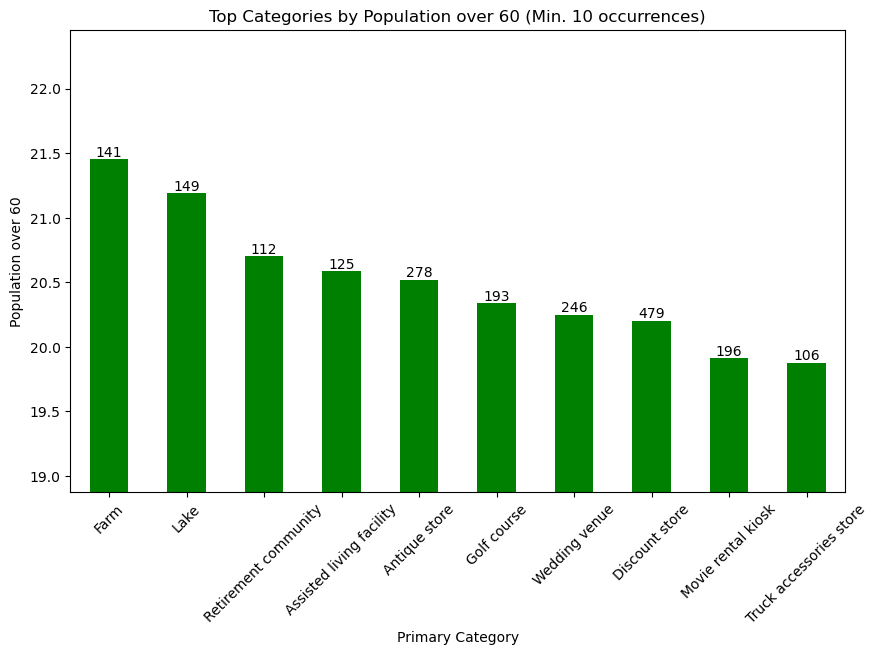

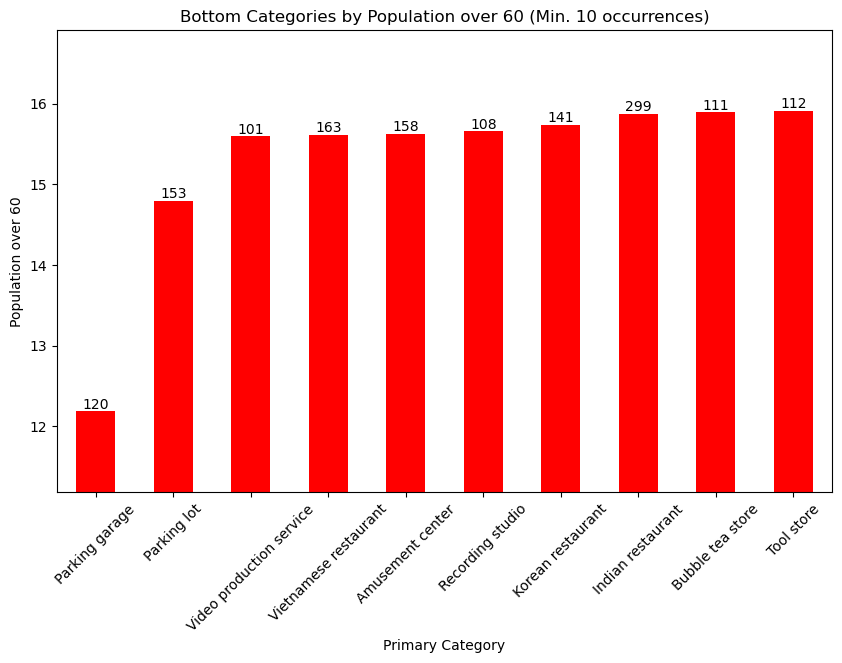

<IPython.core.display.Javascript object>

In [271]:
# occurrences of each primary_category
category_counts = poi_with_census["primary_category"].value_counts()

# categories that occur at least 10 times
valid_categories = category_counts[category_counts >= 100]

# filtering based on the valid categories
valid_merged = poi_with_census[
    poi_with_census["primary_category"].isin(valid_categories.index)
]

# grouping the data by primary_category and calculate the mean approval_percentage
category_approval = valid_merged.groupby("primary_category")["percent_over_60"].mean()

# top 10 categories with the highest mean approval_percentage and their counts
top_categories = category_approval.nlargest(10)
top_categories_counts = valid_categories.loc[top_categories.index]

# bottom 10 categories with the lowest mean approval_percentage and their counts
bottom_categories = category_approval.nsmallest(10)
bottom_categories_counts = valid_categories.loc[bottom_categories.index]

# plotting the chart for the top categories
plt.figure(figsize=(10, 6))
top_categories.plot(kind="bar", color="green")
plt.xlabel("Primary Category")
plt.ylabel("Population over 60")
plt.title("Top Categories by Population over 60 (Min. 10 occurrences)")
plt.xticks(rotation=45)

# adding count of occurrences on the chart
for i, count in enumerate(top_categories_counts):
    plt.text(i, top_categories[i], f"{count}", ha="center", va="bottom")

plt.ylim(
    top_categories.min() - 1, top_categories.max() + 1
)  # adjusting the y-axis range

plt.show()

# plotting the chart for the bottom categories
plt.figure(figsize=(10, 6))
bottom_categories.plot(kind="bar", color="red")
plt.xlabel("Primary Category")
plt.ylabel("Population over 60")
plt.title("Bottom Categories by Population over 60 (Min. 10 occurrences)")
plt.xticks(rotation=45)

# adding the count of occurrences on the chart
for i, count in enumerate(bottom_categories_counts):
    plt.text(i, bottom_categories[i], f"{count}", ha="center", va="bottom")

plt.ylim(
    bottom_categories.min() - 1, bottom_categories.max() + 1
)  # adjusting the y-axis range

plt.show()

## hdma data

In [44]:
hdma

zip_code  average_loan_amount_home_improvement_approved  \
0       30002                                         160100   
1       30004                                         288903   
2       30005                                         294620   
3       30008                                         131850   
4       30009                                         207619   
..        ...                                            ...   
217     31085                                         118744   
218     31097                                         189095   
219     31816                                         199701   
220     31822                                         166952   
221     31830                                         171310   

     average_loan_amount_home_improvement_denied  \
0                                         152390   
1                                         249241   
2                                         233872   
3                                         128016   
4                                         151500   
..                                           ...   
217                                       122917   
218                                       179429   
219                                       202083   
220                                       143495   
221                                       147778   

     average_loan_amount_home_purchase_approved  \
0                                        285173   
1                                        353285   
2                                        304506   
3                                        203547   
4                                        303854   
..                                          ...   
217                                      205762   
218                                      208154   
219                                      158307   
220                                      194977   
221                                      197611   

     average_loan_amount_home_purchase_denied  \
0                                      237129   
1                                      382510   
2                                      335033   
3                                      239984   
4                                      285000   
..                                        ...   
217                                    186209   
218                                    211429   
219                                    126934   
220                                    197619   
221                                    195113   

     loan_count_home_improvement_approved  loan_count_home_improvement_denied  \
0                                     203                                  42   
1                                    1436                                 240   
2                                     862                                 138   
3                                     120                                  42   
4                                      16                                   7   
..                                    ...                                 ...   
217                                    60                                  20   
218                                   106                                  24   
219                                    29                                  11   
220                                   131                                  53   
221                                   106                                  45   

     loan_count_home_purchase_approved  loan_count_home_purchase_denied  \
0                                  624                               76   
1                                 4142                              339   
2                                 2430                              176   
3                                  440                               56   
4                                  140                       

<IPython.core.display.Javascript object>

In [45]:
# creating zip code list to use as filter
zipcodes = hdma["zip_code"].tolist()

<IPython.core.display.Javascript object>

In [46]:
# filtering by zip codes
df3 = df2[df2["zipcode"].isin(zipcodes)]

<IPython.core.display.Javascript object>

In [47]:
df3.reset_index(drop=True, inplace=True)

<IPython.core.display.Javascript object>

In [48]:
# merging hdma data to df3
df3 = df3.merge(hdma[['zip_code', 'approval_percentage', 'zip_median_income', 'median_age_of_housing_units']], left_on='zipcode', right_on='zip_code', how='left')


<IPython.core.display.Javascript object>

In [49]:
# dropping columns not needed
df3.drop(['total_units', 'occupied_units', 'vacant_units', 'zip_code'], axis=1, inplace=True)


<IPython.core.display.Javascript object>

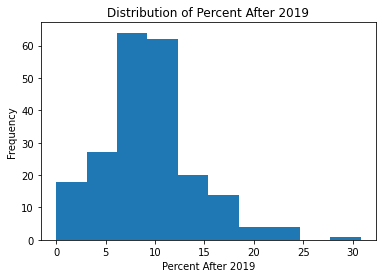

<IPython.core.display.Javascript object>

In [50]:
# looking at distribution to bin
plt.hist(df3["percent_after_2019"], bins=10)
plt.xlabel("Percent After 2019")
plt.ylabel("Frequency")
plt.title("Distribution of Percent After 2019")
plt.show()

In [51]:
# creating new binary columns
df3['new_occupants_0_5_percent'] = np.where((df3['percent_after_2019'] >= 0) & (df3['percent_after_2019'] <= 5), 1, 0)
df3['new_occupants_5_10_percent'] = np.where((df3['percent_after_2019'] > 5) & (df3['percent_after_2019'] <= 10), 1, 0)
df3['new_occupants_10_15_percent'] = np.where((df3['percent_after_2019'] > 10) & (df3['percent_after_2019'] <= 15), 1, 0)
df3['new_occupants_above_15_percent'] = np.where(df3['percent_after_2019'] > 15, 1, 0)



<IPython.core.display.Javascript object>

In [52]:
correlation_matrix = df3.corr()
approval_correlation = correlation_matrix['approval_percentage'].drop('approval_percentage')


<IPython.core.display.Javascript object>

In [53]:
approval_correlation.sort_values(ascending=False)


median_homeowner_value            0.656074
zip_median_income                 0.557611
percent_2000_2499                 0.408999
median_rental_value               0.390081
percent_2500_2999                 0.380334
percent_1500_1999                 0.348803
percent_more_3000                 0.300137
percent_after_2019                0.295766
new_occupants_above_15_percent    0.221154
percent_2015_2019                 0.220250
rent_15_20_percent_income         0.173388
rental_vacancy_rate               0.134998
new_occupants_10_15_percent       0.130350
percent_occupied                  0.112801
rent_25_30_percent_income         0.087906
rent_20_25_percent_income         0.069571
percent_owner_occupied            0.062552
rent_less_15_percent_income       0.030787
percent_2010_2014                 0.021477
homeowner_vacancy_rate           -0.031188
median_age_of_housing_units      -0.044430
percent_renter_occupied          -0.062552
zipcode                          -0.093147
rent_30_35_

<IPython.core.display.Javascript object>

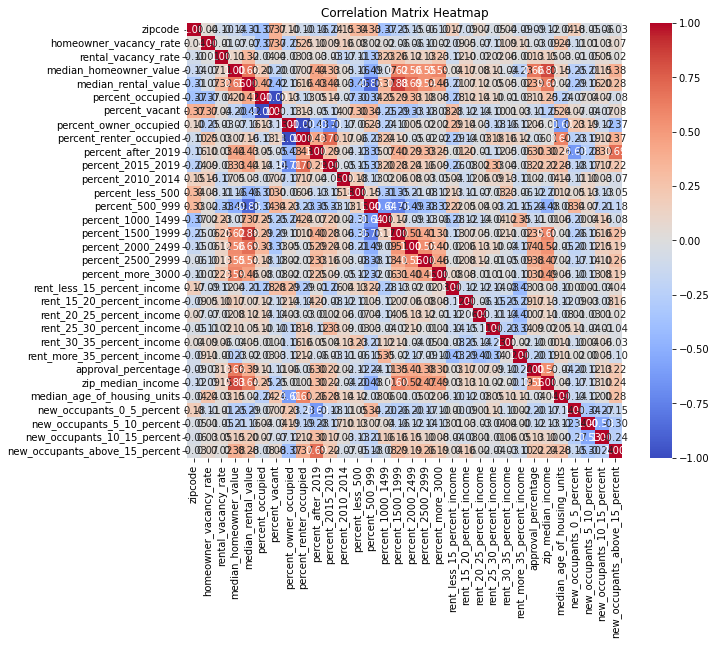

<IPython.core.display.Javascript object>

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create correlation matrix
correlation_matrix = df3.corr()

# Generate heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()


In [55]:
# checking if there are any missing zipcodes
all(poi2["zip_code"].isin(zipcodes))

False

<IPython.core.display.Javascript object>

In [56]:
# checking what is the missing zipcode
set(zipcodes) - set(poi2["zip_code"])

{30070}

<IPython.core.display.Javascript object>

#### Feature engineer: Local Coffee Shops

In [57]:
poi2[poi2["category"].str.contains("coffee", case=False)].category.value_counts()

coffee shop                1168
coffee store                226
coffee roasters              24
coffee wholesaler            14
coffee stand                  6
coffee machine supplier       3
coffee vending machine        1
Name: category, dtype: int64

<IPython.core.display.Javascript object>

In [58]:
pd.set_option("display.max_rows", None)
poi2[poi2["category"].str.contains("coffee", case=False)].name.value_counts()

Starbucks                                                                                                              428
McDonald's                                                                                                             252
Dunkin'                                                                                                                157
Panera Bread                                                                                                            42
Circle K                                                                                                                29
Krispy Kreme                                                                                                            14
Einstein Bros. Bagels                                                                                                   13
Cinnabon                                                                                                                 7
Caribou Coffee  

<IPython.core.display.Javascript object>

In [59]:
coffee_chains = [
    "Starbucks",
    "Auntie Anne's",
    "McDonald's",
    "Krispy Kreme",
    "Golden Pantry Office",
    "The Honey Baked Ham Company",
    "Barnes & Noble",
    "Circle K",
    "RaceTrac",
    "Golden Pantry",
    "Panera Bread",
    "Einstein Bros. Bagels",
    "Sam's Club Cafe",
    "Dunkin",
    "Dunkin’",
    "Dunkin'",
    "Circle K",
    "Einstein Bros. Bagels",
    "Cinnabon",
    "Caribou Coffee",
    "Scooter's Coffee",
    "WFM Coffee Bar",
    "Golden Pantry",
    "Starbucks - Main Lobby Home Depot HQ",
    "Starbucks in Kroger",
    "Chevron Food Mart",
    "Starbucks Roswell and Windsor Parkway",
]
coffee_cats = ["coffee shop", "coffee store", "coffee stand"]

# Replace 'Coffee Shop' with 'Local Coffee' for all local coffee shops
poi2.loc[
    (poi2["category"].isin(coffee_cats)) & (~poi2["name"].isin(coffee_chains)),
    "category",
] = "local coffee"

<IPython.core.display.Javascript object>

In [60]:
print("No. of local Coffee Shops: ", len(poi2[poi2["category"] == "local coffee"]))
poi2[poi2["category"] == "local coffee"]

No. of local Coffee Shops:  431


zip_code                                               name   latitude  \
767       30303                                         Mocha Pops  33.756128   
2018      30075                                        1234 Cafee’  34.032294   
2068      30161                                         Honeycream  34.253246   
2503      30040                                Bean in the Borough  34.166475   
3636      30213                              Rising Phoenix Coffee  33.566938   
4652      30318                                      Galloway Cafe  33.775948   
5221      30108                             Bowdon Coffee Roasters  33.537911   
5323      30088                                       Direct Sales  33.744320   
6079      31822                                Kat's Cafe' & Cakes  32.853726   
8010      30308                                         Tea Corner  33.771460   
8295      30097                                    Lobster Banh Mi  34.022964   
9097      30032                                   The Coffee House  33.785264   
9360      30316                                    Plants + Coffee  33.740391   
9951      30040                                         Donut Stop  34.214619   
10806     30265                        Percolate Coffee & Boutique  33.378113   
11503     30303                                 Centennial Grounds  33.759011   
13234     30096                                        Cafe Window  33.947722   
13612     30534                                  Da Vinci’s Donuts  34.350575   
13674     30075                                    Anti-Psychiatry  34.015663   
13941     30341                                    J Martinez & Co  33.907727   
14849     30240                                   Sweet Roast Cafe  33.038069   
14953     30115                               Alma Coffee Roastery  34.164453   
15164     30326                      Nordstrom Ebar Artisan Coffee  33.853308   
16126     30308                                         Eleven TLC  33.773088   
16536     30030                              Radio Roasters Coffee  33.782934   
16536     30030                              Radio Roasters Coffee  33.782934   
16844     30620                               Jittery Joe's Coffee  33.942922   
16920     30005                             PJ's Coffee Alpharetta  34.067801   
17226     30004                                          Cafe Bora  34.091254   
17626     30228                                Speakeasy Bookstore  33.387162   
18088     30548                The inside story bookstore and cafe  34.105813   
18250     30341                                     The Bunny Hive  33.896249   
18469     30342                                 Lotus Blossom Café  33.909680   
18677     30144                                BOBO DRINKS EXPRESS  34.005742   
18677     30144                                BOBO DRINKS EXPRESS  34.005742   
19010     30041                           Blue Mountain Coffee Inc  34.269478   
20469     30277                                    The Toasty Toad  33.342844   
20505     30533                     Jethro’s Coffee & Public House  34.534067   
21828     30009                                       Antico caffe  34.071361   
22087     30303                     Refuge Coffee Co. Sweet Auburn  33.755416   
22406     30313                             Morsel's Coffee & More  33.758750   
22621     30337                                    The Coffee Bean  33.639693   
23320     30265                                         Cafe South  33.356636   
24335     30030                                      Docent Coffee  33.782249   
24436     30309                                   The Bean Counter  33.787951   
24959     30328                                      Glenlake Cafe  33.940786   
25753     30533                          Canopy + the Roots Coffee  34.531803   
26401     30310                         Finca to Filter Coffee Bar  33.730059   
26787     30281                       

<IPython.core.display.Javascript object>

In [61]:
# new df that has the category appear at least 400 times
threshold = 400
cat_counts = poi2.category.value_counts()

mask = poi2["category"].map(cat_counts) >= threshold
poi3 = poi2[mask]


<IPython.core.display.Javascript object>

In [62]:
print("No. of categories in filtered poi3: ", len(poi3.category.value_counts()))
print("No. of categories in poi2:          ", len(poi2.category.value_counts()))

No. of categories in filtered poi3:  109
No. of categories in poi2:           3169


<IPython.core.display.Javascript object>

In [63]:
poi3["category"].value_counts()

restaurant                      5981
fast food restaurant            3032
auto repair shop                2317
takeout restaurant              2210
gas station                     2077
hair salon                      2002
beauty salon                    1991
american restaurant             1954
convenience store               1852
breakfast restaurant            1690
grocery store                   1573
caterer                         1506
sandwich shop                   1479
clothing store                  1466
church                          1429
nail salon                      1424
tire shop                       1302
atm                             1292
doctor                          1162
park                            1158
mexican restaurant              1156
apartment complex               1150
pizza restaurant                1139
bar                             1093
family restaurant               1058
dentist                         1057
barber shop                     1051
h

<IPython.core.display.Javascript object>

In [64]:
# creating a new df from poi3 that with feature engineered columns

# storing the counts of primary_category values for each zip code
poi4 = poi3.groupby('zip_code')['category'].value_counts().unstack(fill_value=0)

# adding columnn for count of restaurants with avg_rating >= 4.7
poi4['restaurant_above_4.7'] = poi3[(poi3['category'] == 'restaurant') & (poi3['avg_rating'] >= 4.7)].groupby('zip_code')['category'].count()

# another for the count of restaurants with avg_rating < 4.7
poi4['restaurant_below_4.7'] = poi3[(poi3['category'] == 'restaurant') & (poi3['avg_rating'] < 4.7)].groupby('zip_code')['category'].count()

# percentage of restaurants with avg_rating >= 4.7
poi4['restaurant_above_4.7_percentage'] = (poi4['restaurant_above_4.7'] / poi4['restaurant']) * 100

# Reset the index of the new DataFrame
poi4.reset_index(inplace=True)


<IPython.core.display.Javascript object>

In [65]:
poi4.isna().sum().sort_values(ascending=False)

category
restaurant_above_4.7_percentage    88
restaurant_above_4.7               88
restaurant_below_4.7               42
local coffee                        0
pet groomer                         0
park                                0
oil change service                  0
non-profit organization             0
nail salon                          0
moving supply store                 0
mexican restaurant                  0
mens clothing store                 0
medical clinic                      0
mechanic                            0
massage therapist                   0
life insurance agency               0
liquor store                        0
pizza delivery                      0
jewelry store                       0
italian restaurant                  0
insurance agency                    0
ice cream shop                      0
hotel                               0
home insurance agency               0
home goods store                    0
hamburger restaurant                0
hai

<IPython.core.display.Javascript object>

#### zip aggregate

In [66]:
# creating new df with combined info of df3 and poi4
df4 = df3.merge(poi4, left_on='zipcode', right_on='zip_code')


<IPython.core.display.Javascript object>

In [67]:
df4

zipcode  homeowner_vacancy_rate  rental_vacancy_rate  \
0      30002                     1.8                  7.0   
1      30004                     0.3                  4.5   
2      30005                     0.8                  8.8   
3      30008                     2.4                  2.0   
4      30009                     1.3                  7.1   
5      30011                     0.5                  4.1   
6      30012                     0.4                  5.8   
7      30013                     3.6                  4.6   
8      30014                     2.5                  1.8   
9      30016                     0.0                  2.2   
10     30018                     0.0                  0.0   
11     30021                     9.6                  3.3   
12     30022                     0.9                  8.3   
13     30024                     0.7                  7.9   
14     30025                     0.5                 10.8   
15     30028                     0.5                  1.9   
16     30030                     1.3                 11.7   
17     30032                     6.4                  9.4   
18     30033                     2.0                  7.4   
19     30034                     0.9                 11.5   
20     30035                     1.6                  4.2   
21     30038                     3.0                  5.0   
22     30039                     0.5                  5.3   
23     30040                     0.6                  3.3   
24     30041                     0.7                  8.2   
25     30043                     1.3                  6.0   
26     30044                     1.0                  8.2   
27     30046                     1.9                  5.3   
28     30047                     0.7                  2.3   
29     30052                     1.1                  2.7   
30     30054                     2.6                  3.8   
31     30055                     0.3                  0.0   
32     30056                     0.0                 12.7   
33     30058                     1.1                  5.6   
34     30060                     3.8                  4.8   
35     30062                     1.2                  4.8   
36     30064                     1.1                  5.6   
37     30066                     1.3                  5.0   
38     30067                     1.7                  7.0   
39     30068                     0.9                  7.2   
40     30071                     0.4                  3.6   
41     30075                     0.9                 10.0   
42     30076                     1.5                  6.7   
43     30078                     0.9                  7.6   
44     30079                     3.3                  6.1   
45     30080                     0.6                  5.0   
46     30082                     3.0                  9.3   
47     30083                     1.3                 11.9   
48     30084                     2.3                  5.0   
49     30087                     0.3                  9.5   
50     30088                     2.3                  3.2   
51     30090                     NaN                  NaN   
52     30092                     0.8                  6.2   
53     30093                     0.3                  6.6   
54     30094                     1.2                  4.6   
55     30096                     0.3                  3.6   
56     30097                     0.8                 11.4   
57     30101                     0.4                  3.6   
58     30102                     1.9                  0.6   
59     30103                     2.9                  0.0   
60     30104                     4.1                  1.3   
61     30106                     1.3                  3.9   
62     30107                     0.3                  3.6   
63     30108                     0.0                  0.0   
64     30110                     1.3    

<IPython.core.display.Javascript object>

## Correlation with different variables

In [68]:
# median age correlation

correlation1 = df4.corr()["median_age_of_housing_units"].sort_values(ascending=False)
correlation1

median_age_of_housing_units        1.000000
percent_renter_occupied            0.606776
apartment complex                  0.422588
non-profit organization            0.330195
apartment building                 0.295701
percent_2015_2019                  0.281538
new_occupants_above_15_percent     0.279809
bar                                0.277681
tobacco shop                       0.270624
percent_after_2019                 0.260194
homeowner_vacancy_rate             0.241460
percent_vacant                     0.238312
liquor store                       0.205238
local coffee                       0.200441
restaurant_above_4.7               0.191362
seafood restaurant                 0.190778
tourist attraction                 0.189351
event venue                        0.171990
barber shop                        0.169353
restaurant                         0.160777
median_homeowner_value             0.146944
rent_more_35_percent_income        0.134879
percent_2010_2014               

<IPython.core.display.Javascript object>

In [69]:
# approval percentage
df4.corr()['approval_percentage'].sort_values(ascending=False)



approval_percentage                1.000000
median_homeowner_value             0.653251
zip_median_income                  0.556199
percent_2000_2499                  0.406461
median_rental_value                0.390081
percent_2500_2999                  0.378692
local coffee                       0.348079
percent_1500_1999                  0.343994
veterinarian                       0.333897
massage therapist                  0.331140
chiropractor                       0.329248
italian restaurant                 0.325485
cafe                               0.311451
real estate agency                 0.301605
percent_more_3000                  0.298628
percent_after_2019                 0.287858
bar                                0.284845
cosmetic dentist                   0.282891
pet groomer                        0.282881
park                               0.278672
bakery                             0.275945
waxing hair removal service        0.272723
gym                             

<IPython.core.display.Javascript object>

In [70]:
# median_homeowner_value
df4.corr()["median_homeowner_value"].sort_values(ascending=False)

median_homeowner_value             1.000000
zip_median_income                  0.835088
median_rental_value                0.657640
approval_percentage                0.653251
percent_1500_1999                  0.616186
percent_more_3000                  0.588295
percent_2000_2499                  0.562588
percent_2500_2999                  0.545179
bar                                0.524449
italian restaurant                 0.515773
real estate agency                 0.512486
waxing hair removal service        0.484243
local coffee                       0.482084
massage therapist                  0.466445
cafe                               0.464023
gym                                0.463891
percent_after_2019                 0.432729
business center                    0.422374
cosmetic dentist                   0.420921
chiropractor                       0.409863
tourist attraction                 0.387588
delivery restaurant                0.380397
dentist                         

<IPython.core.display.Javascript object>

In [71]:
# looking at top correlation between features

# correlation matrix
correlation_matrix = df4.corr()

# upper triangular portion of the correlation matrix
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# stacking the upper triangle portion into a DataFrame
correlation = upper_triangle.stack().sort_values(ascending=False)

# 10 highest correlated variables
print(correlation.head(600))


zipcode                       zip_code                        1.000000
restaurant                    restaurant_below_4.7            0.995548
auto insurance agency         home insurance agency           0.977181
home insurance agency         renters insurance agency        0.976075
                              life insurance agency           0.968398
mens clothing store           womens clothing store           0.966425
auto insurance agency         renters insurance agency        0.965005
clothing store                womens clothing store           0.964455
                              shoe store                      0.961921
fashion accessories store     womens clothing store           0.961086
shoe store                    womens clothing store           0.952211
fashion accessories store     shoe store                      0.952024
life insurance agency         renters insurance agency        0.950323
mens clothing store           shoe store                      0.949952
clothi

<IPython.core.display.Javascript object>

In [72]:
# doing the same for negative corr

# correlation matrix
correlation_matrix = df4.corr()

# lower triangular portion of the correlation matrix
lower_triangle = correlation_matrix.where(np.tril(np.ones(correlation_matrix.shape), k=-1).astype(bool))

# stacking the lower triangle portion into a DataFrame
correlation = lower_triangle.stack().sort_values()

# Print the 20 most negatively correlated variables
print(correlation.head(400))


percent_renter_occupied          percent_owner_occupied         -1.000000
percent_vacant                   percent_occupied               -1.000000
percent_500_999                  median_rental_value            -0.863412
percent_1500_1999                percent_500_999                -0.768884
percent_2015_2019                percent_owner_occupied         -0.706011
apartment complex                percent_owner_occupied         -0.673232
percent_1000_1499                percent_500_999                -0.637490
new_occupants_0_5_percent        percent_after_2019             -0.617687
apartment building               percent_owner_occupied         -0.616482
median_age_of_housing_units      percent_owner_occupied         -0.606776
shopping mall                    percent_500_999                -0.585976
hair salon                       percent_500_999                -0.576960
caterer                          percent_500_999                -0.571246
breakfast restaurant             perce

<IPython.core.display.Javascript object>

## New dataframe with df3 and poi2 combined

In [73]:


# merging the dataframes based on zip code
merged = pd.merge(poi2, df3[['zipcode', 'rental_vacancy_rate', 'median_homeowner_value', 'median_rental_value',
                             'percent_after_2019', 'rent_more_35_percent_income', 'rent_less_15_percent_income',
                             'approval_percentage', 'zip_median_income', 'median_age_of_housing_units']],
                  left_on='zip_code', right_on='zipcode', how='left')

# dropping the duplicate 'zipcode' column
merged.drop('zipcode', axis=1, inplace=True)



<IPython.core.display.Javascript object>

In [74]:
# looking at highly corr features

# correlation matrix
correlation_matrix = merged.corr()

# triangular portion of the correlation matrix
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# stacking the upper triangle portion into a DataFrame
correlation = upper_triangle.stack().sort_values(ascending=False)

# 10 highest correlated variables
print(correlation.head(10))


median_homeowner_value  zip_median_income         0.841361
                        median_rental_value       0.700074
                        approval_percentage       0.696388
median_rental_value     zip_median_income         0.661959
approval_percentage     zip_median_income         0.601375
median_rental_value     approval_percentage       0.459524
latitude                approval_percentage       0.396032
median_homeowner_value  percent_after_2019        0.383551
median_rental_value     percent_after_2019        0.340265
latitude                median_homeowner_value    0.314684
dtype: float64


<IPython.core.display.Javascript object>

In [75]:
# correlation
merged.corr()["approval_percentage"].sort_values(ascending=False)

approval_percentage            1.000000
median_homeowner_value         0.696388
zip_median_income              0.601375
median_rental_value            0.459524
latitude                       0.396032
percent_after_2019             0.312322
rent_less_15_percent_income    0.147120
avg_rating                     0.105056
longitude                     -0.001660
rental_vacancy_rate           -0.003104
median_age_of_housing_units   -0.012285
num_of_reviews                -0.031688
zip_code                      -0.076969
rent_more_35_percent_income   -0.332703
Name: approval_percentage, dtype: float64

<IPython.core.display.Javascript object>

## Visuals

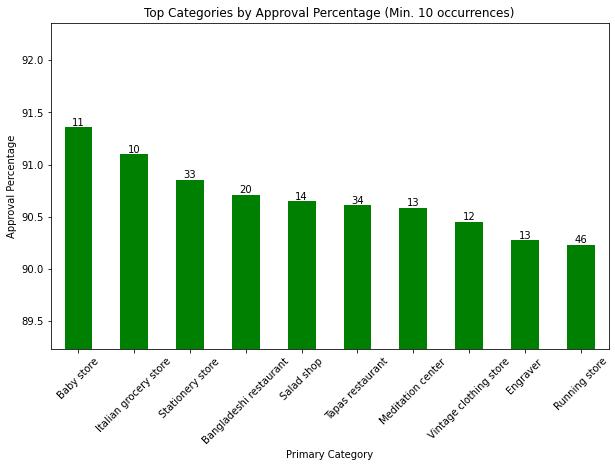

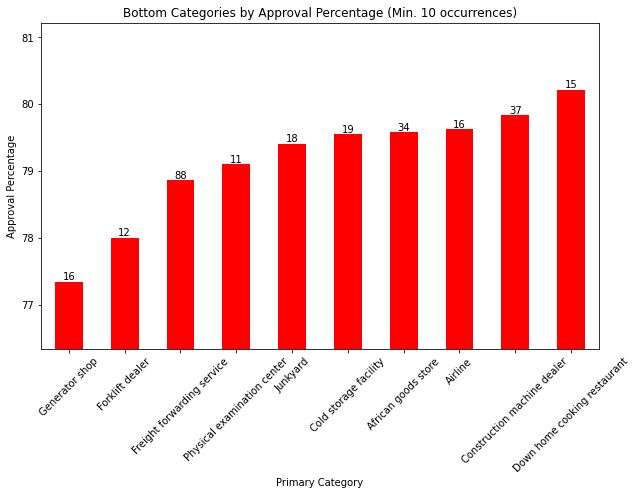

<IPython.core.display.Javascript object>

In [76]:


# occurrences of each primary_category
category_counts = merged['primary_category'].value_counts()

# categories that occur at least 10 times
valid_categories = category_counts[category_counts >= 10]

# filtering based on the valid categories
valid_merged = merged[merged['primary_category'].isin(valid_categories.index)]

# grouping the data by primary_category and calculate the mean approval_percentage
category_approval = valid_merged.groupby('primary_category')['approval_percentage'].mean()

# top 10 categories with the highest mean approval_percentage and their counts
top_categories = category_approval.nlargest(10)
top_categories_counts = valid_categories.loc[top_categories.index]

# bottom 10 categories with the lowest mean approval_percentage and their counts
bottom_categories = category_approval.nsmallest(10)
bottom_categories_counts = valid_categories.loc[bottom_categories.index]

# plotting the chart for the top categories
plt.figure(figsize=(10, 6))
top_categories.plot(kind='bar', color='green')
plt.xlabel('Primary Category')
plt.ylabel('Approval Percentage')
plt.title('Top Categories by Approval Percentage (Min. 10 occurrences)')
plt.xticks(rotation=45)

# adding count of occurrences on the chart
for i, count in enumerate(top_categories_counts):
    plt.text(i, top_categories[i], f'{count}', ha='center', va='bottom')

plt.ylim(top_categories.min() - 1, top_categories.max() + 1)  # adjusting the y-axis range

plt.show()

# plotting the chart for the bottom categories
plt.figure(figsize=(10, 6))
bottom_categories.plot(kind='bar', color='red')
plt.xlabel('Primary Category')
plt.ylabel('Approval Percentage')
plt.title('Bottom Categories by Approval Percentage (Min. 10 occurrences)')
plt.xticks(rotation=45)

# adding the count of occurrences on the chart
for i, count in enumerate(bottom_categories_counts):
    plt.text(i, bottom_categories[i], f'{count}', ha='center', va='bottom')

plt.ylim(bottom_categories.min() - 1, bottom_categories.max() + 1)  # adjusting the y-axis range

plt.show()


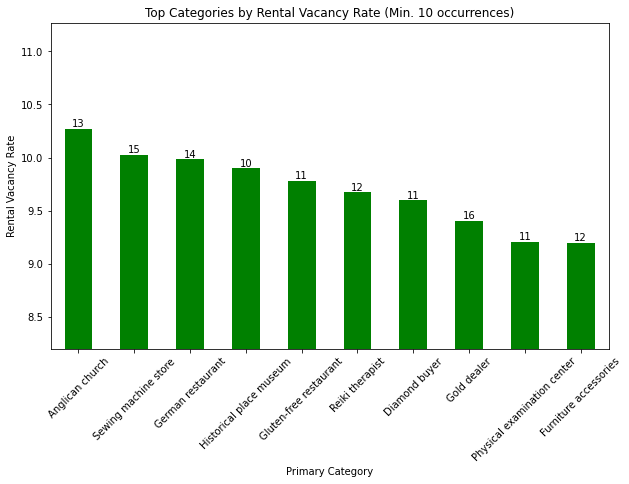

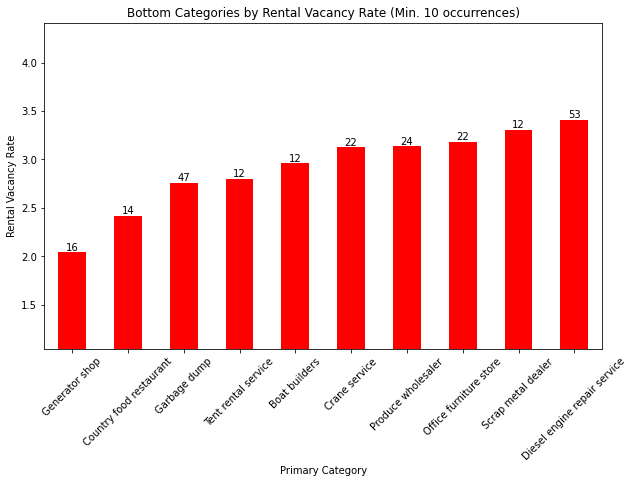

<IPython.core.display.Javascript object>

In [77]:
# occurrences of each primary_category
category_counts = merged["primary_category"].value_counts()

# categories that occur at least 10 times
valid_categories = category_counts[category_counts >= 10]

# filtering based on the valid categories
valid_merged = merged[merged["primary_category"].isin(valid_categories.index)]

# grouping the data by primary_category and calculate the mean approval_percentage
category_approval = valid_merged.groupby("primary_category")[
    "rental_vacancy_rate"
].mean()

# top 10 categories with the highest mean approval_percentage and their counts
top_categories = category_approval.nlargest(10)
top_categories_counts = valid_categories.loc[top_categories.index]

# bottom 10 categories with the lowest mean approval_percentage and their counts
bottom_categories = category_approval.nsmallest(10)
bottom_categories_counts = valid_categories.loc[bottom_categories.index]

# plotting the chart for the top categories
plt.figure(figsize=(10, 6))
top_categories.plot(kind="bar", color="green")
plt.xlabel("Primary Category")
plt.ylabel("Rental Vacancy Rate")
plt.title("Top Categories by Rental Vacancy Rate (Min. 10 occurrences)")
plt.xticks(rotation=45)

# adding count of occurrences on the chart
for i, count in enumerate(top_categories_counts):
    plt.text(i, top_categories[i], f"{count}", ha="center", va="bottom")

plt.ylim(
    top_categories.min() - 1, top_categories.max() + 1
)  # adjusting the y-axis range

plt.show()

# plotting the chart for the bottom categories
plt.figure(figsize=(10, 6))
bottom_categories.plot(kind="bar", color="red")
plt.xlabel("Primary Category")
plt.ylabel("Rental Vacancy Rate")
plt.title("Bottom Categories by Rental Vacancy Rate (Min. 10 occurrences)")
plt.xticks(rotation=45)

# adding the count of occurrences on the chart
for i, count in enumerate(bottom_categories_counts):
    plt.text(i, bottom_categories[i], f"{count}", ha="center", va="bottom")

plt.ylim(
    bottom_categories.min() - 1, bottom_categories.max() + 1
)  # adjusting the y-axis range

plt.show()

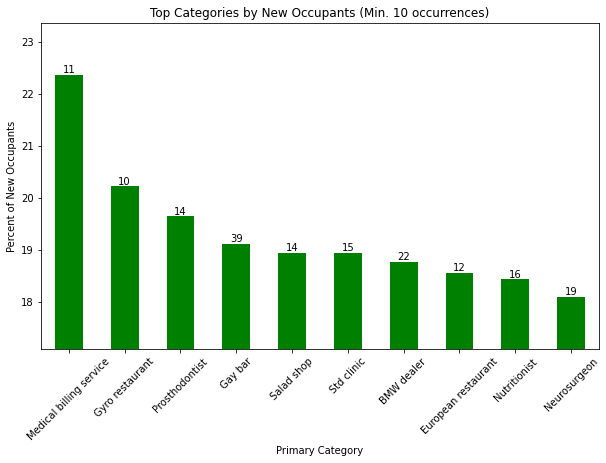

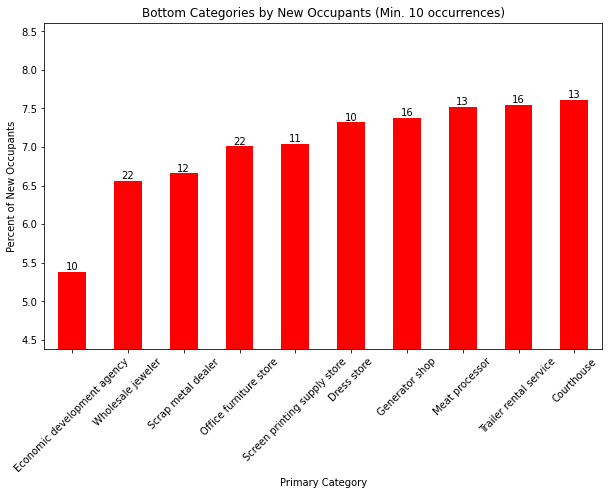

<IPython.core.display.Javascript object>

In [78]:
# occurrences of each primary_category
category_counts = merged["primary_category"].value_counts()

# categories that occur at least 10 times
valid_categories = category_counts[category_counts >= 10]

# filtering based on the valid categories
valid_merged = merged[merged["primary_category"].isin(valid_categories.index)]

# grouping the data by primary_category and calculate the mean approval_percentage
category_approval = valid_merged.groupby("primary_category")[
    "percent_after_2019"
].mean()

# top 10 categories with the highest mean approval_percentage and their counts
top_categories = category_approval.nlargest(10)
top_categories_counts = valid_categories.loc[top_categories.index]

# bottom 10 categories with the lowest mean approval_percentage and their counts
bottom_categories = category_approval.nsmallest(10)
bottom_categories_counts = valid_categories.loc[bottom_categories.index]

# plotting the chart for the top categories
plt.figure(figsize=(10, 6))
top_categories.plot(kind="bar", color="green")
plt.xlabel("Primary Category")
plt.ylabel("Percent of New Occupants")
plt.title("Top Categories by New Occupants (Min. 10 occurrences)")
plt.xticks(rotation=45)

# adding count of occurrences on the chart
for i, count in enumerate(top_categories_counts):
    plt.text(i, top_categories[i], f"{count}", ha="center", va="bottom")

plt.ylim(
    top_categories.min() - 1, top_categories.max() + 1
)  # adjusting the y-axis range

plt.show()

# plotting the chart for the bottom categories
plt.figure(figsize=(10, 6))
bottom_categories.plot(kind="bar", color="red")
plt.xlabel("Primary Category")
plt.ylabel("Percent of New Occupants")
plt.title("Bottom Categories by New Occupants (Min. 10 occurrences)")
plt.xticks(rotation=45)

# adding the count of occurrences on the chart
for i, count in enumerate(bottom_categories_counts):
    plt.text(i, bottom_categories[i], f"{count}", ha="center", va="bottom")

plt.ylim(
    bottom_categories.min() - 1, bottom_categories.max() + 1
)  # adjusting the y-axis range

plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import haversine_distances
from math import radians

# Convert latitude and longitude to radians
merged['latitude_rad'] = merged['latitude'].apply(radians)
merged['longitude_rad'] = merged['longitude'].apply(radians)

# Prepare data for clustering
X = merged[['latitude_rad', 'longitude_rad']].values

# Compute Haversine distance matrix
dist_matrix = haversine_distances(X)

# Set epsilon (maximum distance between samples) to 0.25 miles
epsilon = 0.25 / 3959

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=epsilon, min_samples=6, metric='precomputed')
labels = dbscan.fit_predict(dist_matrix)

# Add cluster labels to the dataframe
merged['cluster_label'] = labels

# Filter dataframe to include only clusters with more than one observation
clustered_df = merged[merged['cluster_label'] != -1]

# Identify primary_category values within the same cluster
clustered_categories = clustered_df.groupby('cluster_label')['primary_category'].unique()

# Print the primary_category values within the same cluster
for cluster_label, categories in clustered_categories.items():
    print(f"Cluster {cluster_label}: {', '.join(categories)}")


In [ ]:
df3

In [ ]:
df4

In [ ]:
merged_df

In [ ]:
merged

In [ ]:
# range of approval_percentage
approval_min = merged['approval_percentage'].min()
approval_max = merged['approval_percentage'].max()

# printing the range
print(f"Range of approval_percentage: {approval_min} to {approval_max}")


In [ ]:
# # looking at produce wholesaler observations
merged[merged['primary_category'] == 'Produce wholesaler']



In [ ]:
merged.to_csv('poi_expanded.csv', index=False)


In [ ]:
df4.to_csv("zipcode_expanded", index=False)

In [ ]:

# Convert the poi_df DataFrame to a csv buffer in memory
csv_buffer = io.StringIO()
poi.to_csv(csv_buffer, index=False)

# Naming the file for AWS storage
file_name = "points-of-interest-google3.csv"

# Uploading the file to S3 and printing the response
response = s3R.Object(bucket_name, file_name).put(Body=csv_buffer.getvalue())
print(f"File uploaded to S3 with ETag: {response['ETag']}")  

In [ ]:
# Convert the poi_df DataFrame to a csv buffer in memory
csv_buffer = io.StringIO()
df.to_csv(csv_buffer, index=False)

# Naming the file for AWS storage
file_name = "census_data"

# Uploading the file to S3 and printing the response
response = s3R.Object(bucket_name, file_name).put(Body=csv_buffer.getvalue())
print(f"File uploaded to S3 with ETag: {response['ETag']}")  # C

## Expirimenting with GeoSpatial Correlation

In [83]:
print("poi2: ", poi2.shape)
print("poi3: ", poi3.shape)

poi2:  (213319, 8)
poi3:  (99375, 8)


<IPython.core.display.Javascript object>

In [85]:
file_name = "listings_with_tract.csv"

# Downloading the file from S3 and parsing it into a dataframe
s3.download_file(bucket_name, file_name, file_name)
# Low memory is set to False because columns have mixed data types
listings = pd.read_csv(file_name, index_col=False, low_memory=False)

<IPython.core.display.Javascript object>

In [86]:
listings.head(3)

latitude  longitude   full_street_address     city    county_name  beds  \
0  33.971863 -83.618736       633 Marigot Way  Statham  Barrow-County   3.0   
1  34.018024 -83.663994      431 Dunahoo Road   Winder  Barrow-County   3.0   
2  34.003227 -83.749001  471 Monticello Court   Winder  Barrow-County   4.0   

   baths_full  baths_half  square_footage  lot_size  year_built  \
0         2.0         0.0          1634.0       1.0      2004.0   
1         2.0         0.0          1625.0       0.0      1998.0   
2         3.0         0.0          1816.0       0.0      2001.0   

                                  details  special_features   price  \
0  Detached, 3 Beds, 2 Baths, 1,634 Sq Ft                 0  305000   
1  Detached, 3 Beds, 2 Baths, 1,625 Sq Ft                 0  349900   
2  Detached, 4 Beds, 3 Baths, 1,816 Sq Ft                 0  289900   

   transaction_type  listing_status  listing_special_features  \
0                 1               1                         0   
1                 1               1                         0   
2                 1               1                         0   

  census_state_name census_county_name    zip        GEOID  \
0           Georgia         Barrow, GA  30666  13013180401   
1           Georgia         Barrow, GA  30680  13013180301   
2           Georgia         Barrow, GA  30680  13013180303   

   census_tract_number  
0          13013180401  
1          13013180301  
2          13013180303

<IPython.core.display.Javascript object>

In [84]:
poi3.head()

zip_code                     name   latitude  longitude  \
1     30096  Gwinnett Community Bank  34.007883 -84.133413   
1     30096  Gwinnett Community Bank  34.007883 -84.133413   
2     30096     Corley Insurance Inc  34.006241 -84.136169   
2     30096     Corley Insurance Inc  34.006241 -84.136169   
2     30096     Corley Insurance Inc  34.006241 -84.136169   

                category  avg_rating  num_of_reviews  primary_category  
1                   bank         3.0               2              Bank  
1                    atm         3.0               2              Bank  
2       insurance agency         4.1               8  Insurance agency  
2  auto insurance agency         4.1               8  Insurance agency  
2  home insurance agency         4.1               8  Insurance agency

<IPython.core.display.Javascript object>

In [88]:
import geopandas as gpd
from shapely.geometry import Point

# Create GeoDataFrame
geometry = [Point(xy) for xy in zip(poi3['longitude'], poi3['latitude'])]
gdf = gpd.GeoDataFrame(poi3, geometry=geometry)

# Save GeoDataFrame as Shapefile
output_path = '../data/poi3_geoDataFrame.shp'
gdf.to_file(output_path)


/var/folders/_j/zgrrpz8955l530bsdd3qxdq80000gp/T/ipykernel_81387/600262422.py:10: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(output_path)


<IPython.core.display.Javascript object>

In [95]:
from pysal.explore import esda

<IPython.core.display.Javascript object>

In [90]:
# Read geospatial data
data = gpd.read_file("../data/poi3_geoDataFrame.shp")

/Users/bschmidt/opt/anaconda3/lib/python3.9/site-packages/spaghetti/network.py:39: FutureWarning: The next major release of pysal/spaghetti (2.0.0) will drop support for all ``libpysal.cg`` geometries. This change is a first step in refactoring ``spaghetti`` that is expected to result in dramatically reduced runtimes for network instantiation and operations. Users currently requiring network and point pattern input as ``libpysal.cg`` geometries should prepare for this simply by converting to ``shapely`` geometries.
  warnings.warn(f"{dep_msg}", FutureWarning)


<IPython.core.display.Javascript object>

In [92]:
data.head()

zip_code                     name   latitude  longitude  \
0     30096  Gwinnett Community Bank  34.007883 -84.133413   
1     30096  Gwinnett Community Bank  34.007883 -84.133413   
2     30096     Corley Insurance Inc  34.006241 -84.136169   
3     30096     Corley Insurance Inc  34.006241 -84.136169   
4     30096     Corley Insurance Inc  34.006241 -84.136169   

                category  avg_rating  num_of_rev        primary_ca  \
0                   bank         3.0           2              Bank   
1                    atm         3.0           2              Bank   
2       insurance agency         4.1           8  Insurance agency   
3  auto insurance agency         4.1           8  Insurance agency   
4  home insurance agency         4.1           8  Insurance agency   

                     geometry  
0  POINT (-84.13341 34.00788)  
1  POINT (-84.13341 34.00788)  
2  POINT (-84.13617 34.00624)  
3  POINT (-84.13617 34.00624)  
4  POINT (-84.13617 34.00624)

<IPython.core.display.Javascript object>

In [97]:
import pysal.lib as libpysal

<IPython.core.display.Javascript object>

In [98]:
# Perform spatial autocorrelation analysis
y = data['geometry']  # Variable to analyze

# Create a spatial weights matrix
w = libpysal.weights.Queen.from_dataframe(data)

# Calculate Moran's I
moran = esda.Moran(y, w)

# Print Moran's I statistic and p-value
print("Moran's I:", moran.I)
print("p-value:", moran.p_sim)


KeyError: 30125

<IPython.core.display.Javascript object>

In [ ]:
# To perform a geospatial correlation between two dataframes based on latitude and longitude in Python, you can use the geospatial libraries like GeoPandas and Shapely. Here's a step-by-step guide to help you:

# Install the necessary libraries:
# python
# Copy code
# pip install geopandas shapely
# Import the required libraries:
# python
# Copy code
# import geopandas as gpd
# from shapely.geometry import Point
# Load the data into DataFrames:
# python
# Copy code
# df1 = gpd.read_file('path_to_dataframe1.csv')
# df2 = gpd.read_file('path_to_dataframe2.csv')
# Make sure that your dataframes contain columns for latitude and longitude.

# Create Point objects from latitude and longitude:
# python
# Copy code
# geometry1 = [Point(xy) for xy in zip(df1['longitude'], df1['latitude'])]
# geometry2 = [Point(xy) for xy in zip(df2['longitude'], df2['latitude'])]
# Convert the lists of Point objects into GeoDataFrames:
# python
# Copy code
# gdf1 = gpd.GeoDataFrame(df1, geometry=geometry1)
# gdf2 = gpd.GeoDataFrame(df2, geometry=geometry2)
# Perform the spatial join or correlation:
# python
# Copy code
# correlated_data = gpd.sjoin(gdf1, gdf2, how='inner', op='intersects')
# The how parameter specifies the type of join ('inner', 'left', 'right', or 'outer'), and the op parameter specifies the type of spatial relationship ('intersects', 'contains', 'within', etc.).

# Analyze the correlated data as per your requirements:
# python
# Copy code
# print(correlated_data)
# You can access the correlated data and perform further analysis or calculations on the resulting DataFrame.

# Make sure that your dataframes have a consistent coordinate reference system (CRS). If they have different CRS, you may need to reproject one or both dataframes to a common CRS before performing the spatial join.

# By following these steps, you should be able to perform a geospatial correlation between two dataframes using latitude and longitude in Python.